In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium

In [4]:
# Lista de nombres de archivos
files = ['GASTO_TURISTICO_2019.csv', 'GASTO_TURISTICO_2021.csv',
         'GASTO_TURISTICO_2022Q1.csv', 'GASTO_TURISTICO_2022Q2.csv', 'GASTO_TURISTICO_2022Q3.csv',]

# Lista vacía para almacenar los diferentes de datos
frames = []
for file in files:
    # Leer archivo CSV
    data = pd.read_csv('./datos/' + file, sep=';', usecols=('SEXO', 'EDAD', 'PAIS_RESIDENCIA', 'TRIMESTRE', 'AEROPUERTO_ORIGEN', 'PAIS_DESTINO', 'ISLA', 'ALOJ_CATEG', 'PERSONAS_0_2', 'PERSONAS_3_12', 'PERSONAS_13_15', 'PERSONAS_16_64', 'PERSONAS_65_O_MAS', 'PERSONAS_TOTAL', 'COMPRA_VUELO', 'COMPRA_ALOJ', 'PAQUETE_TURISTICO', 'SERV_NINGUNO', 'SERV_EXCURSIONES', 'SERV_TRANSFERS', 'SERV_ALQ_VEHICULO', 'SERV_OTROS', 'COSTE_VUELOS_EUROS', 'GRATIS_VUELOS', 'COSTE_ALOJ_EUROS', 'GRATIS_ALOJ', 'TIPO_PENSION', 'GASTO_EUROS', 'DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_TRANSP_PUBLICO',
                       'DESGLOSE_ALIM_SUPER', 'DESGLOSE_RESTAURANT', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES', 'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO', 'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD', 'DESGLOSE_SOUVENIRS', 'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS', 'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS', 'NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF', 'NOCHES_LG', 'NOCHES_LP', 'NOCHES_EH', 'NOCHES_CRUCERO', 'NOCHES', 'SIN_PERNOCTAR_LZ', 'SIN_PERNOCTAR_FV', 'SIN_PERNOCTAR_GC', 'SIN_PERNOCTAR_TF', 'SIN_PERNOCTAR_LG', 'SIN_PERNOCTAR_LP', 'SIN_PERNOCTAR_EH', 'PRIMERA_VISITA_CANARIAS'), encoding='latin-1')
    frames.append(data)

# Concatenar marcos de datos
main_df = pd.concat(frames)
main_df['GASTO_EUROS'] = main_df['GASTO_EUROS'].str.replace(',', '.')

/tmp/ipykernel_679/618313799.py:9: DtypeWarning: Columns (121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./datos/' + file, sep=';', usecols=('SEXO', 'EDAD', 'PAIS_RESIDENCIA', 'TRIMESTRE', 'AEROPUERTO_ORIGEN', 'PAIS_DESTINO', 'ISLA', 'ALOJ_CATEG', 'PERSONAS_0_2', 'PERSONAS_3_12', 'PERSONAS_13_15', 'PERSONAS_16_64', 'PERSONAS_65_O_MAS', 'PERSONAS_TOTAL', 'COMPRA_VUELO', 'COMPRA_ALOJ', 'PAQUETE_TURISTICO', 'SERV_NINGUNO', 'SERV_EXCURSIONES', 'SERV_TRANSFERS', 'SERV_ALQ_VEHICULO', 'SERV_OTROS', 'COSTE_VUELOS_EUROS', 'GRATIS_VUELOS', 'COSTE_ALOJ_EUROS', 'GRATIS_ALOJ', 'TIPO_PENSION', 'GASTO_EUROS', 'DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_TRANSP_PUBLICO',


In [34]:
main_df

AEROPUERTO_ORIGEN PAIS_DESTINO  SEXO  EDAD PAIS_RESIDENCIA  NOCHES_LZ  \
0                   ACE       GBR826     6    68          GBR826         10   
1                   ACE       IRL372     1    53          IRL372          3   
2                   ACE       FRA250     6    22          FRA250          5   
3                   ACE       FRA250     1    70          FRA250         18   
4                   ACE       FRA250     6    34          FRA250          5   
...                 ...          ...   ...   ...             ...        ...   
11301               TFS       IRL372     6    44          IRL372          0   
11302               TFS       IRL372     6    27          IRL372          0   
11303               TFS       IRL372     6    19          IRL372          0   
11304               TFS       IRL372     6    21          IRL372          0   
11305               TFS       IRL372     6    37          IRL372          0   

       NOCHES_FV  NOCHES_GC  NOCHES_TF  NOCHES_LG  ...  DESGLOSE_PARQUES_OCIO  \
0              0          0          0          0  ...                      0   
1              0          0          0          0  ...                      0   
2              0          0          0          0  ...                      0   
3              0          0          0          0  ...                      0   
4              0          0          0          0  ...                      0   
...          ...        ...        ...        ...  ...                    ...   
11301          0          0          3          0  ...                      0   
11302          0          0          6          0  ...                      0   
11303          0          0          7          0  ...                      0   
11304          0          0          7          0  ...           4,7477744807   
11305          0          0          7          0  ...           9,7701149425   

       DESGLOSE_DISCOTECAS  DESGLOSE_SALUD  DESGLOSE_SOUVENIRS  \
0                        0               0                   0   
1                       50               0                  10   
2                        0               0        11,363636364   
3                        0               0                   0   
4                        0    12,195121951        23,170731707   
...                    ...             ...                 ...   
11301         30,769230769               0        6,1538461538   
11302                    0               0        48,477876532   
11303                    0               0        71,428571429   
11304                    0    14,836795252        11,869436202   
11305          17,24137931               0        5,7471264368   

       DESGLOSE_BIENES_INMUEBLES  DESGLOSE_OTRAS_COMPRAS  DESGLOSE_FARMACIA  \
0                              0                       0                  0   
1                              0                       0                  0   
2                              0                       0                  0   
3                              0                       0                  0   
4                              0                       0                  0   
...                          ...                     ...                ...   
11301                          0                       0                  0   
11302                          0                       0        6,463716871   
11303                          0                       0                  0   
11304                          0                       0                  0   
11305                          0                       0       5,7471264368   

       DESGLOSE_OTROS_GASTOS  PRIMERA_VISITA_CANARIAS  TRIMESTRE  
0                          0                        6     2019Q1  
1                          0                        6     2019Q1  
2                          0                        1     2019Q1  
3                          0                        1     2019Q1  
4      

# PIE CHART EDAD DE ENCUESTADOS POR TRIMESTRES O AÑOS

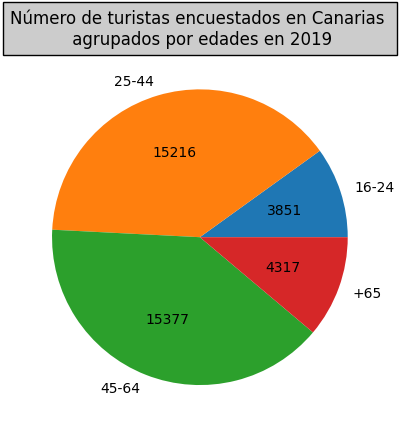

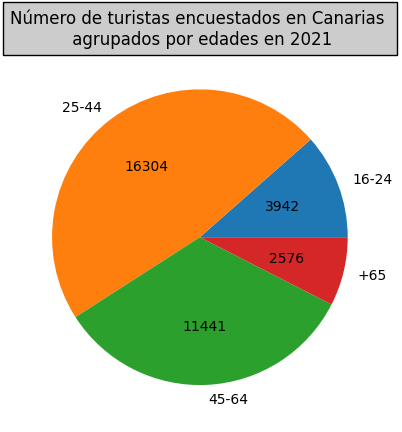

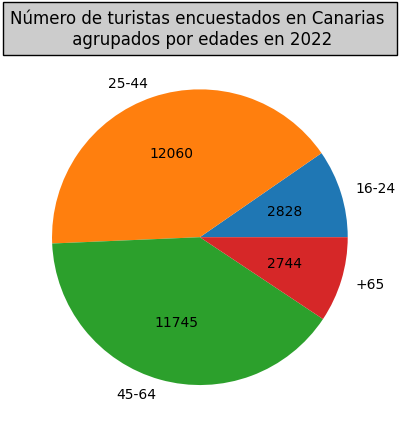

In [5]:
from collections import OrderedDict

Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))

age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]

# Iterar Years si se quiere por años o Trimester por trimestre
for time in Years:
    count_ages = []
    for pos in range(len(limit_ages)):
        if pos == len(limit_ages)-1:
            count_ages.append(((main_df.TRIMESTRE.str.contains(time)) & (
                main_df.EDAD > limit_ages[pos])).sum())
        else:
            count_ages.append(((main_df.TRIMESTRE.str.contains(time)) & (
                main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])).sum())

    plt.pie(count_ages, labels=age_ranges,
            autopct=lambda x: '{:.0f}'.format(x*sum(count_ages)/100))
    plt.title("Número de turistas encuestados en Canarias \n agrupados por edades en " +
              time, bbox={'facecolor': '0.8', 'pad': 5})
    plt.show()
    

# CHART SEXO

[]

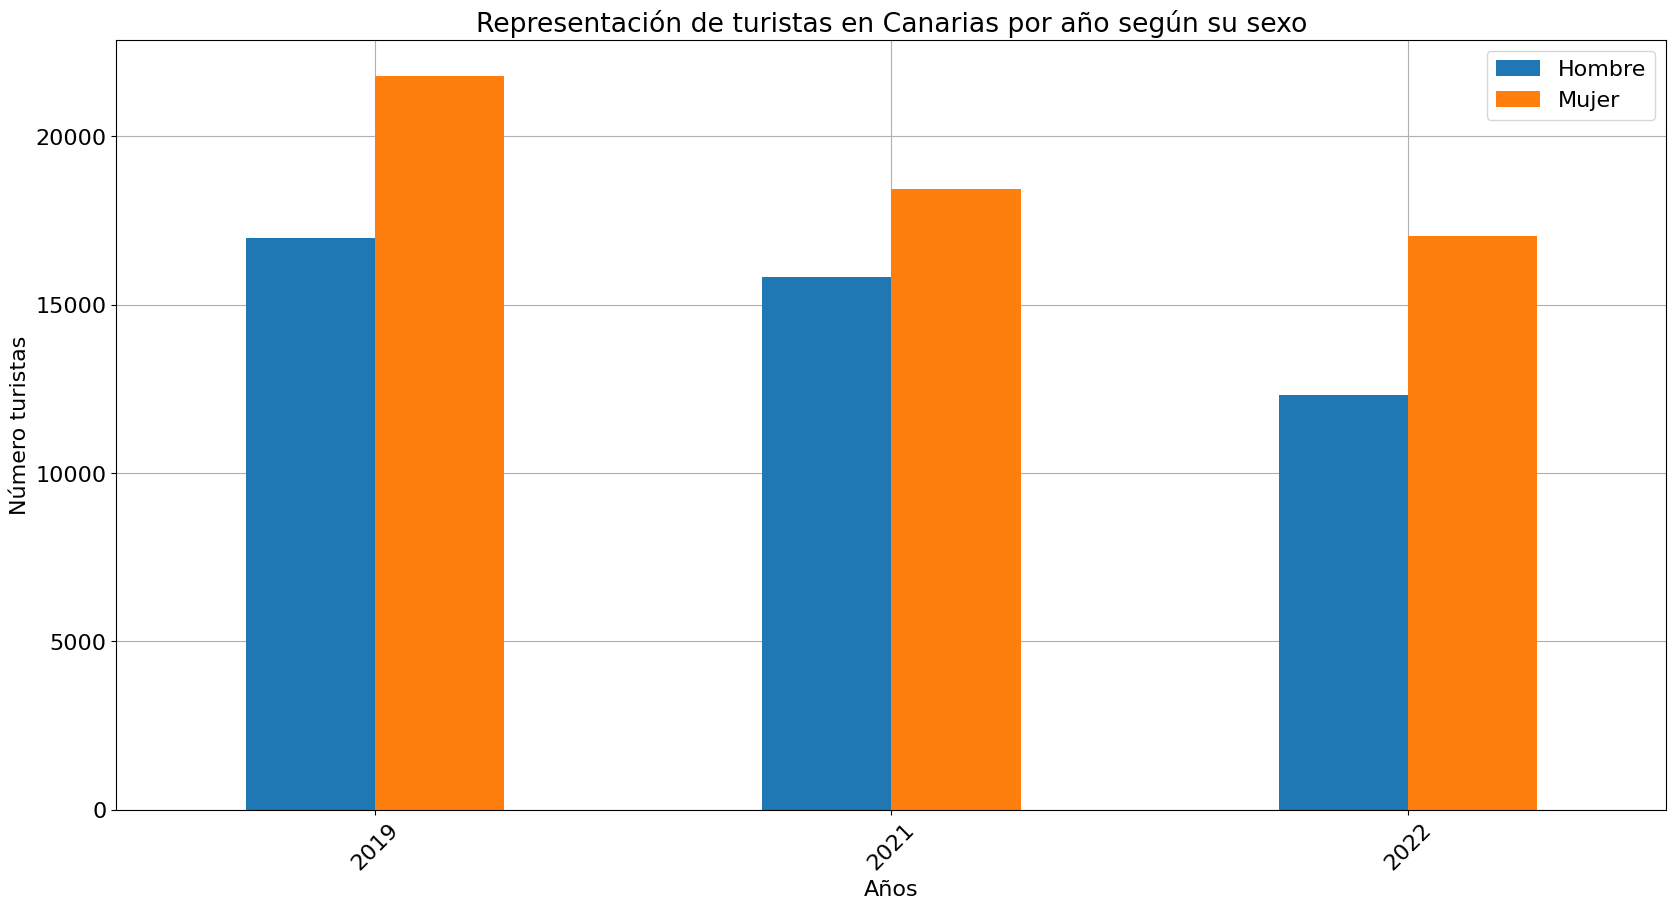

In [6]:
Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))

sexs = ['Hombre', 'Mujer']
sex_id = [1, 6]

zeros_array = np.zeros((len(Years), len(sexs)), dtype=int)

y = 0
for time in Years:
    zeros_array[y][0] = len(
        main_df[(main_df.SEXO == sex_id[0]) & (main_df.TRIMESTRE.str.contains(time))])
    zeros_array[y][1] = len(
        main_df[(main_df.SEXO == sex_id[1]) & (main_df.TRIMESTRE.str.contains(time))])
    y += 1

plt.rcParams.update({'font.size': 16})
df2 = pd.DataFrame(zeros_array, index=Years, columns=sexs)
ax = df2.plot.bar(figsize=(20, 10))
ax.set_title(
    "Representación de turistas en Canarias por año según su sexo", color='black')
ax.set_xlabel("Años")
ax.set_ylabel("Número turistas")
ax.grid(True)
ax.set_axisbelow(True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.tick_params(axis='x', rotation=45)
ax.plot()


# CHART PAIS RESIDENCIA

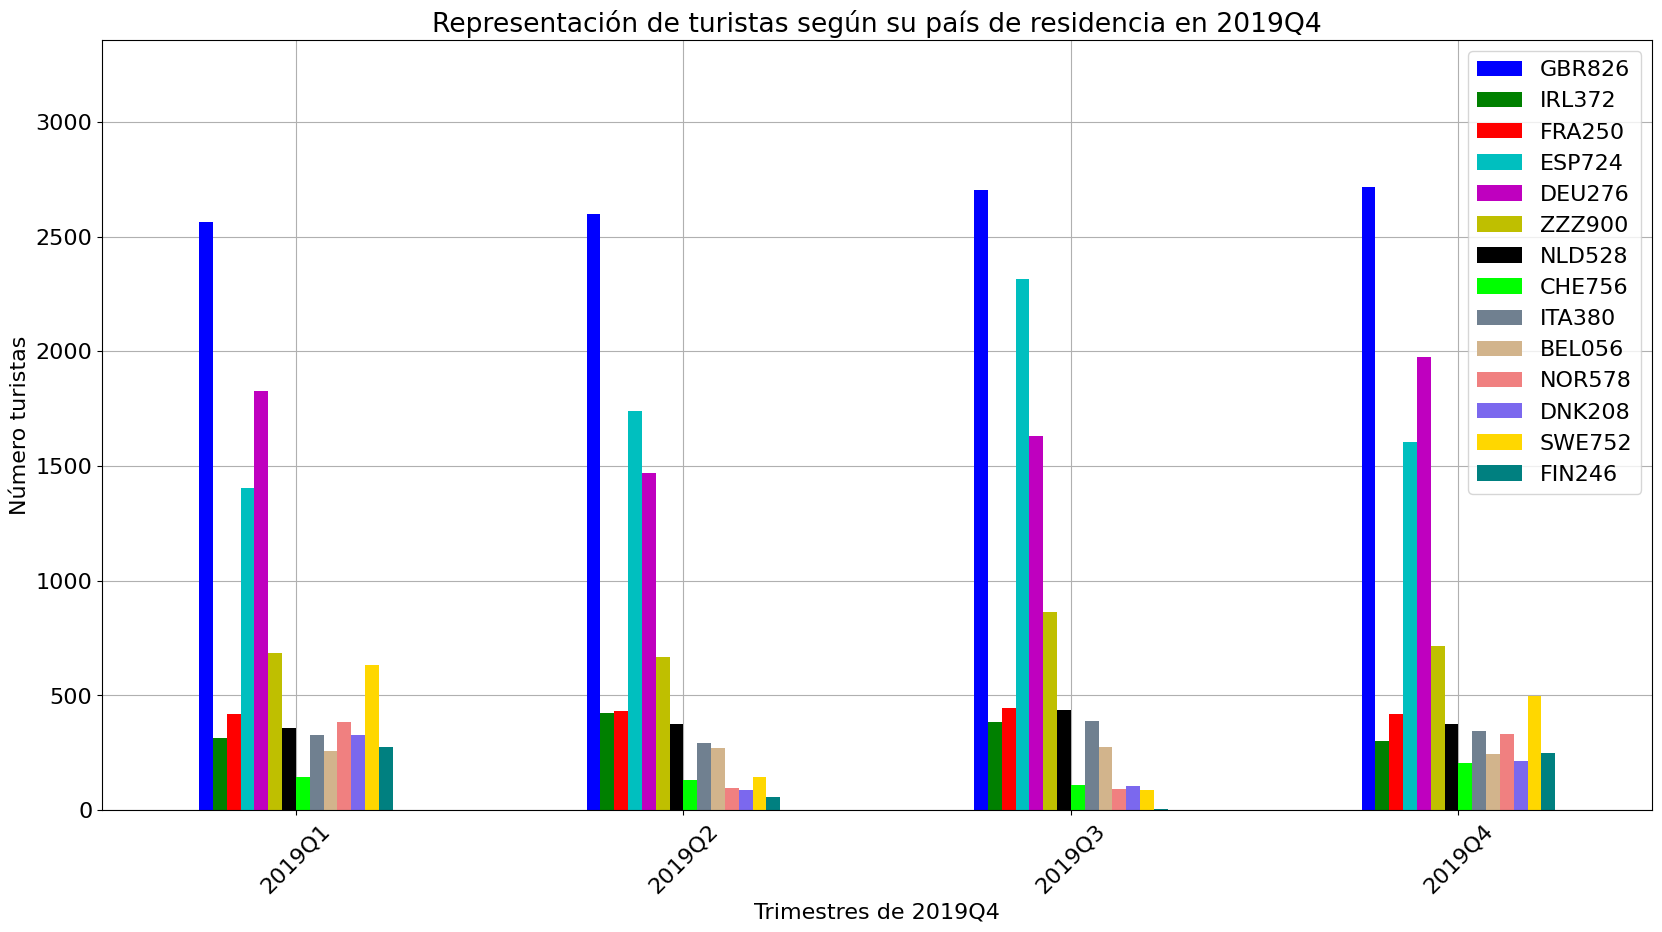

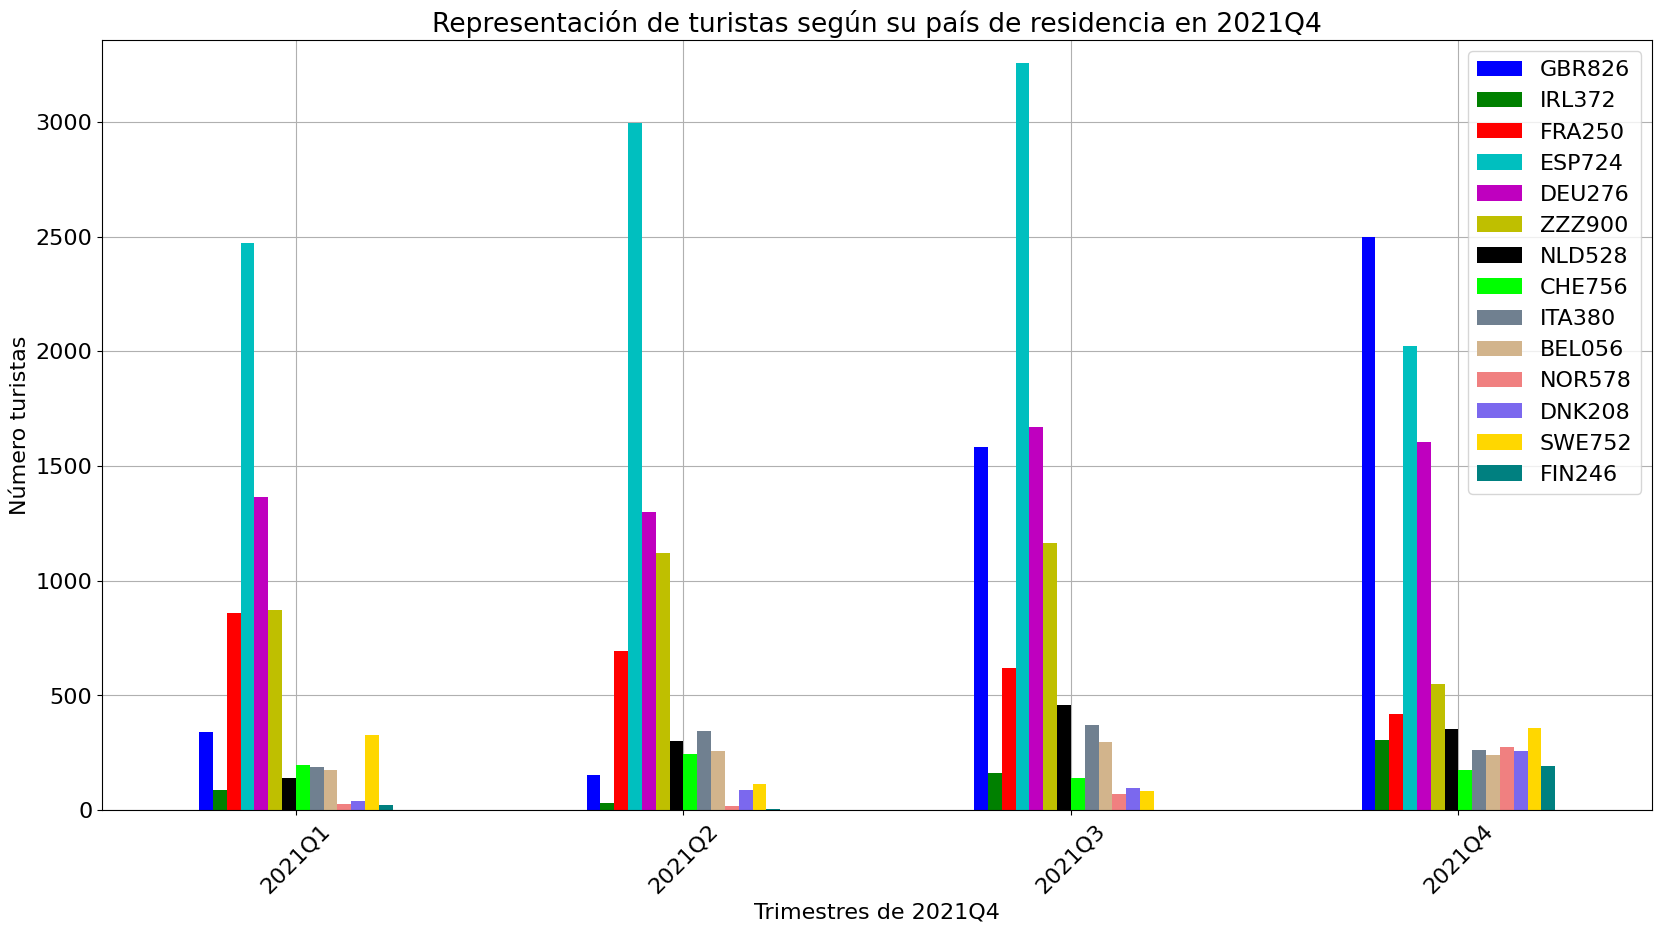

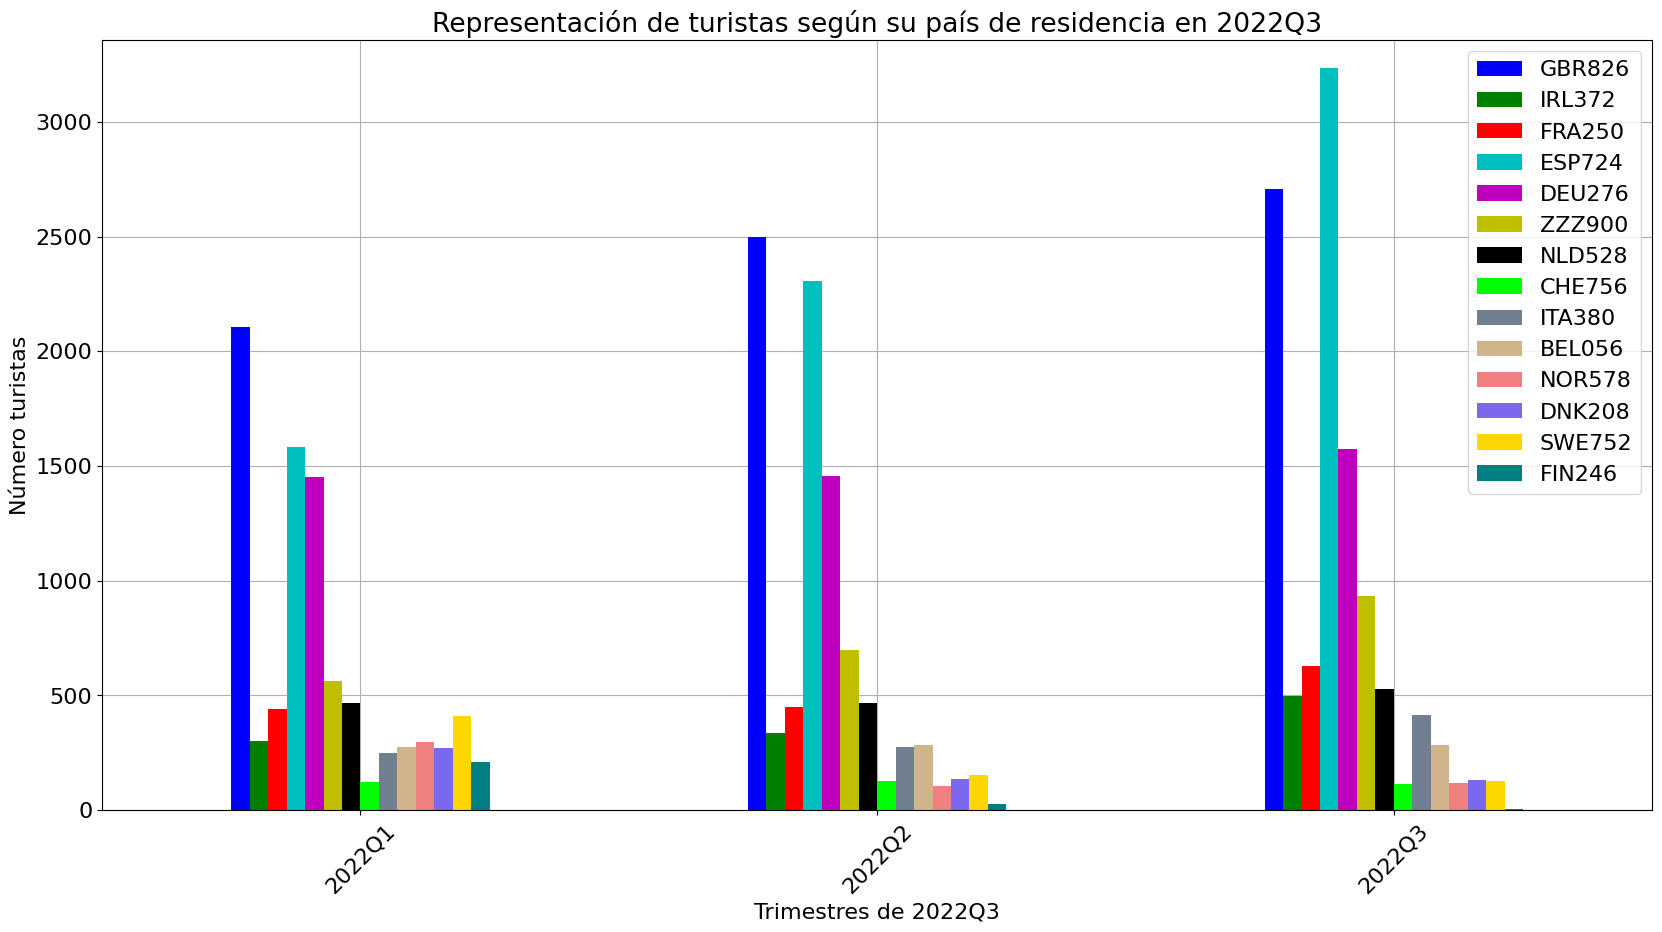

In [7]:
Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))
Countries = main_df.PAIS_RESIDENCIA.unique()

# Hallamos el número máximo de turistas encuestados que residen en un mismo país durante los 3 años,
# para usar dicho valor en el eje y de las gráficas
max_tourist = 0
for location in Countries:
    for time in Trimester:
        if (len(main_df[(main_df.PAIS_RESIDENCIA == location) & (main_df.TRIMESTRE == time)])) > max_tourist:
            max_tourist = (
                len(main_df[(main_df.PAIS_RESIDENCIA == location) & (main_df.TRIMESTRE == time)]))

for time in Years:

    temp = [x for x in Trimester if time in x]

    zeros_array = np.zeros((len(temp), len(Countries)), dtype=int)

    x = 0
    for location in Countries:
        y = 0
        for time in temp:
            zeros_array[y][x] = len(
                main_df[(main_df.PAIS_RESIDENCIA == location) & (main_df.TRIMESTRE == time)])
            y += 1
        x += 1

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'slategrey',
              'tan', 'lightcoral', 'mediumslateblue', 'gold', 'teal', 'royalblue']

    df = pd.DataFrame(zeros_array, index=temp, columns=Countries)
    ax = df.plot.bar(color=colors, figsize=(20, 10))
    ax.set_title(
        "Representación de turistas según su país de residencia en " + time, color='black')
    ax.set_xlabel("Trimestres de " + time)
    ax.set_ylabel("Número turistas")
    ax.set_ylim([0, max_tourist+100])
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.tick_params(axis='x', rotation=45)
    ax.plot()


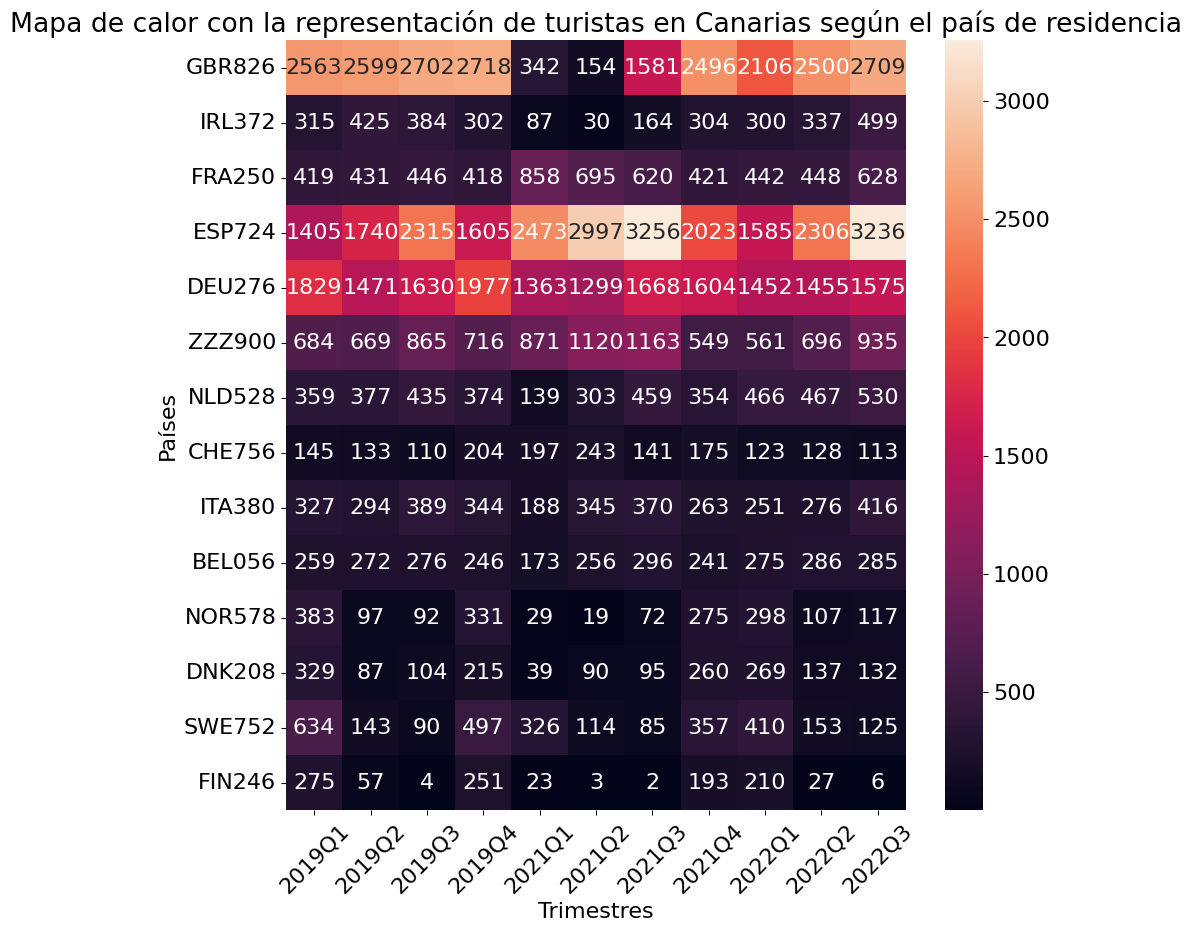

In [8]:
Trimester = main_df.TRIMESTRE.unique()
Countries = main_df.PAIS_RESIDENCIA.unique()

zeros_matrix = np.zeros((len(Countries), len(Trimester)), dtype=int)

x = 0
for location in Countries:
    y = 0
    for tri in Trimester:
        zeros_matrix[x][y] = len(
            main_df[(main_df.PAIS_RESIDENCIA == location) & (main_df.TRIMESTRE == tri)])
        y += 1
    x += 1

tourists_by_location_df = pd.DataFrame(
    zeros_matrix, index=Countries, columns=Trimester)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tourists_by_location_df, annot=True, fmt='g')
ax.set_title(
    "Mapa de calor con la representación de turistas en Canarias según el país de residencia")
ax.set_xlabel("Trimestres")
ax.set_ylabel("Países")
ax.tick_params(axis='x', rotation=45)


# GRAFICO DE LINEAS SOBRE NUMERO DE NOCHES POR ISLA EN TOTAL 



#TOTAL DE NOCHES EN ISLAS POR TRIMESTRES

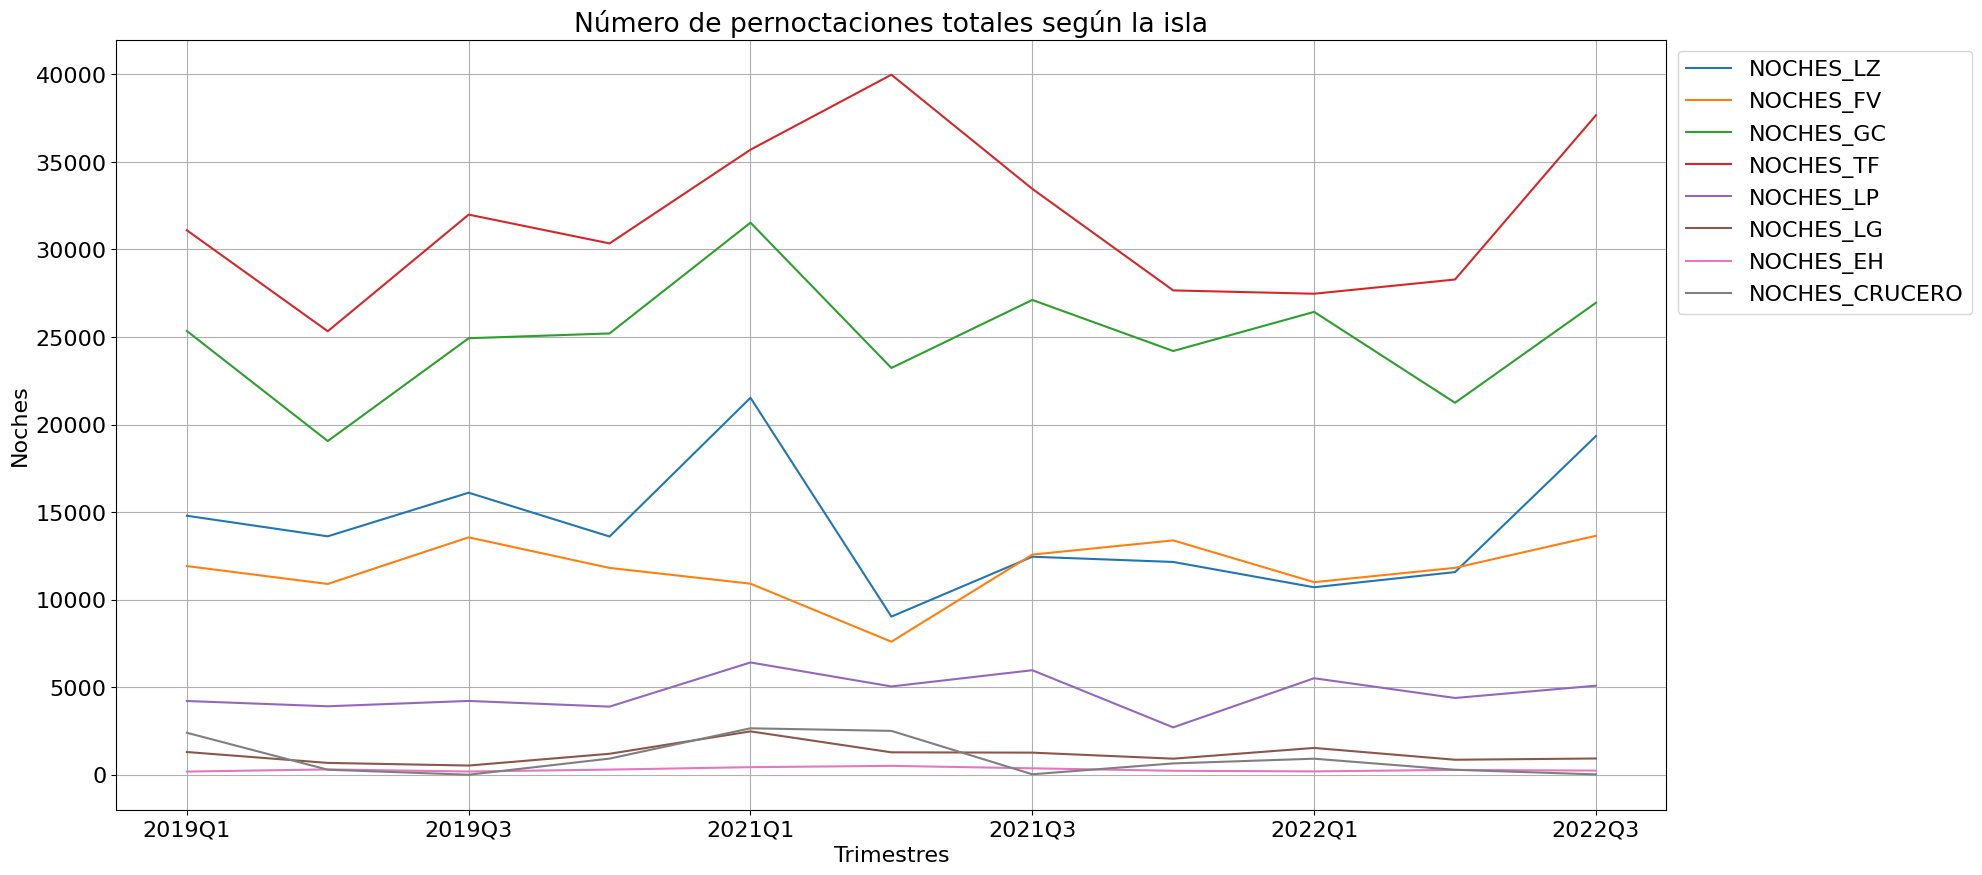

In [9]:
Trimester = main_df.TRIMESTRE.unique()
age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]
overnights_cols = ['NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF',
                   'NOCHES_LP', 'NOCHES_LG', 'NOCHES_EH', 'NOCHES_CRUCERO']

result = {overnight: [] for overnight in overnights_cols}
for time in Trimester:
    query = (main_df['TRIMESTRE'] == time)
    for overnight in overnights_cols:
        result[overnight].append(main_df.loc[query, overnight].sum())

total_overnights_df = pd.DataFrame(result, index=Trimester)
ax = total_overnights_df.plot.line(figsize=(20, 10))
ax.set_title("Número de pernoctaciones totales según la isla")
ax.set_xlabel("Trimestres")
ax.set_ylabel("Noches")
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.grid(True)
ax.set_axisbelow(True)


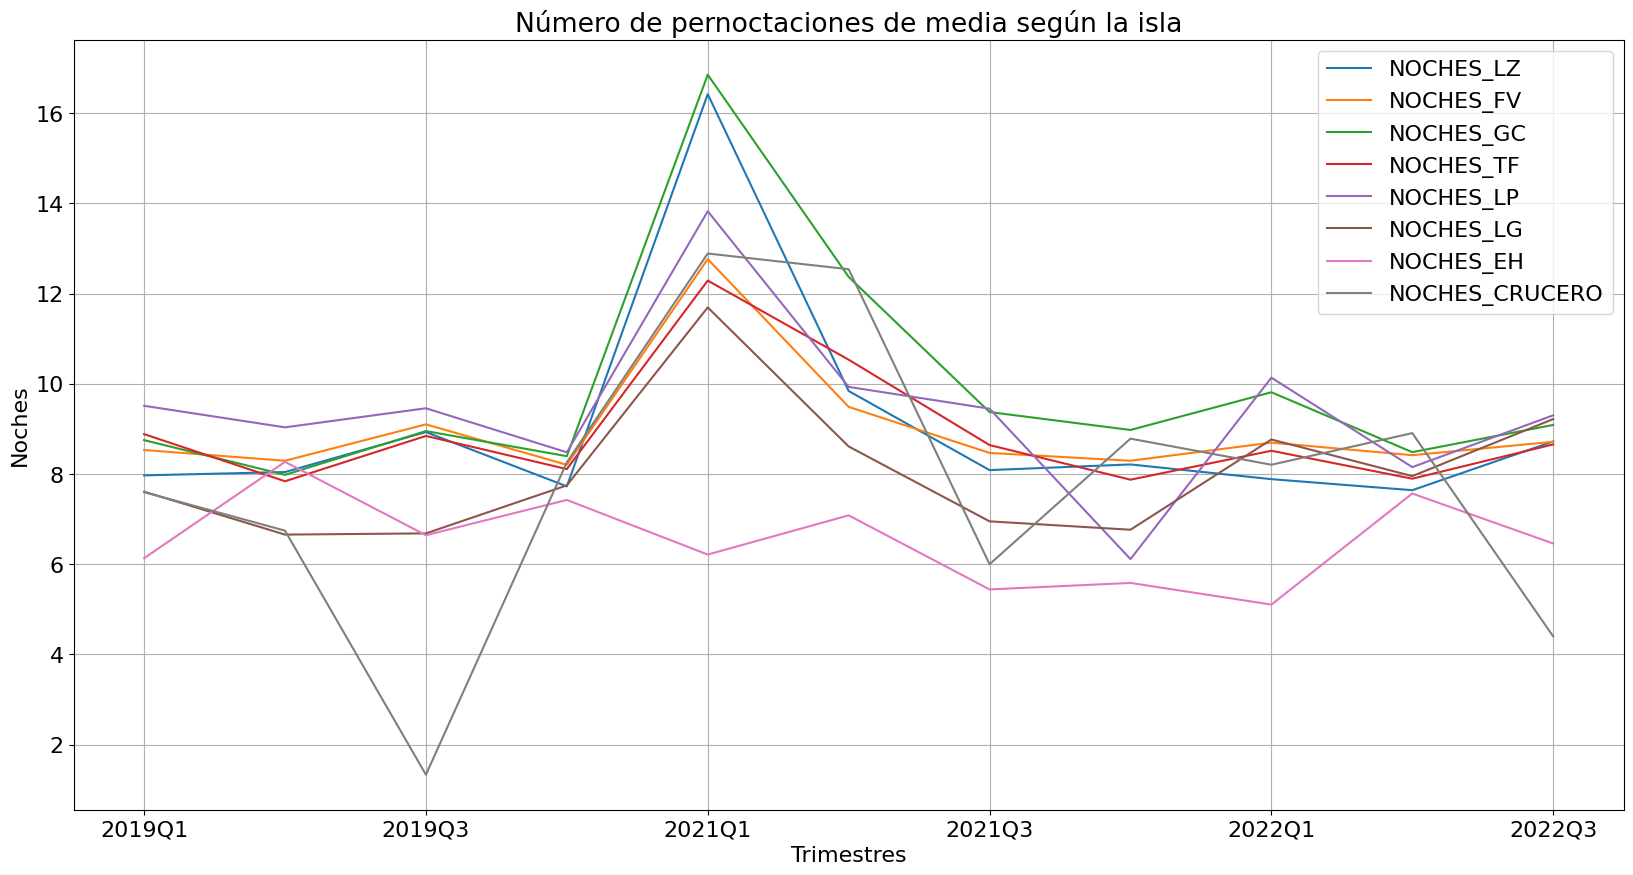

In [10]:
Trimester = main_df.TRIMESTRE.unique()
age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]
overnights_cols = ['NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF',
                   'NOCHES_LP', 'NOCHES_LG', 'NOCHES_EH', 'NOCHES_CRUCERO']

main_df_copy = main_df.copy()
main_df_copy = main_df_copy.replace(0, np.NaN)

result = {overnight: [] for overnight in overnights_cols}
for tri in Trimester:
    query = (main_df_copy['TRIMESTRE'] == tri)
    for overnight in overnights_cols:
        result[overnight].append(main_df_copy.loc[query, overnight].mean())

mean_overnights_df = pd.DataFrame(result, index=Trimester)

ax = mean_overnights_df.plot.line(figsize=(20, 10))
ax.set_title("Número de pernoctaciones de media según la isla")
ax.set_xlabel("Trimestres")
ax.set_ylabel("Noches")
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.grid(True)
ax.set_axisbelow(True)


# GRAFICO DE LINEAS SOBRE NUMERO DE NOCHES POR ISLA AGRUPADO POR EDADES

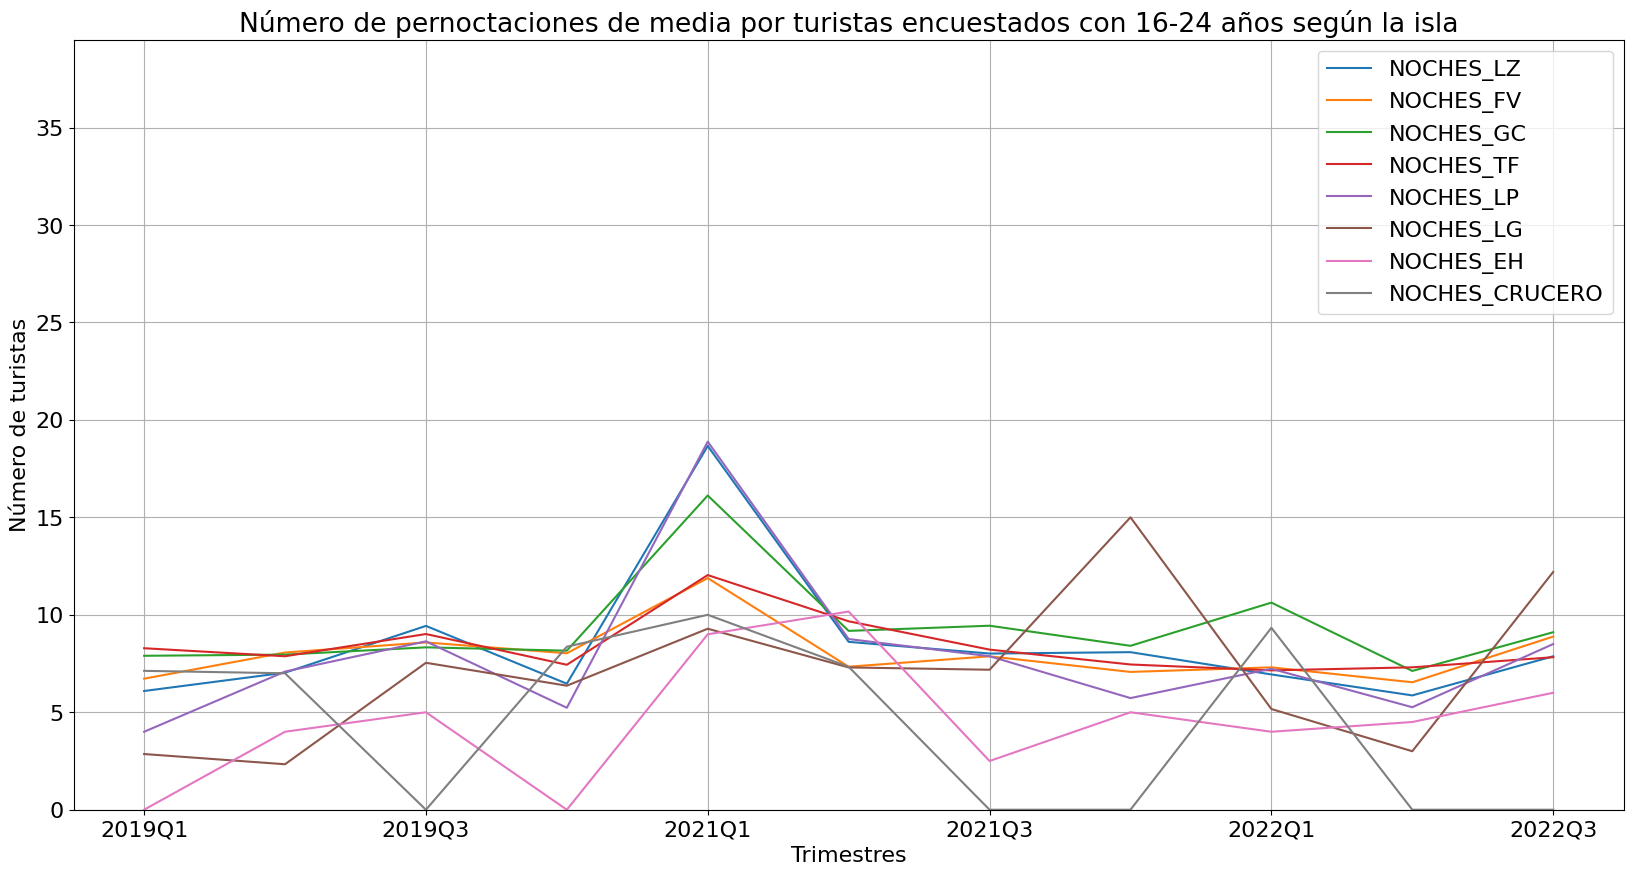

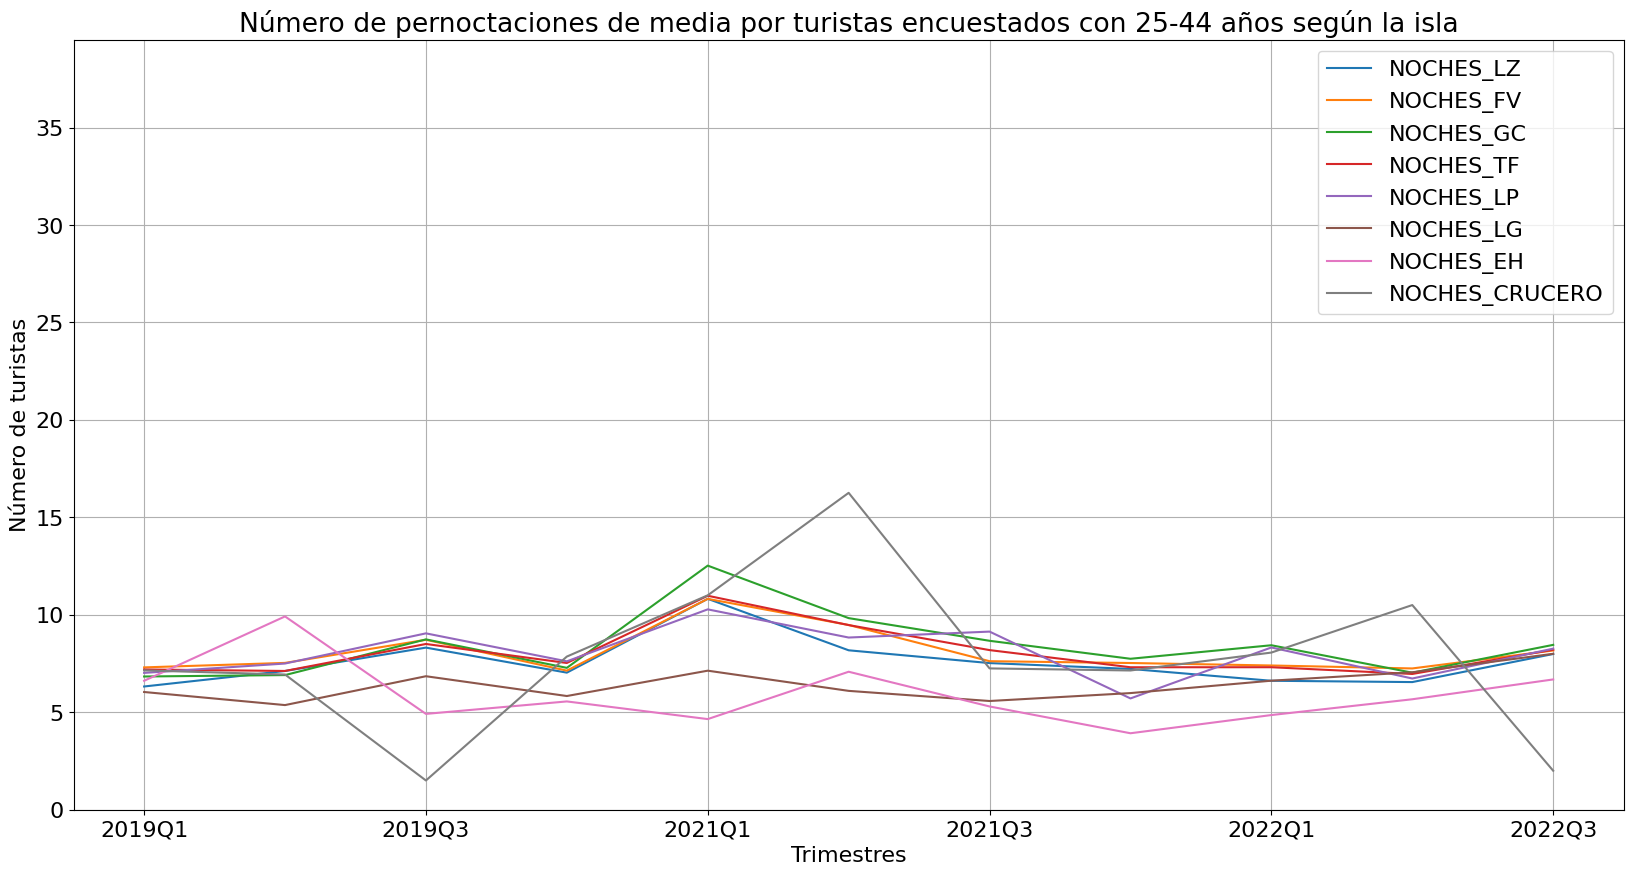

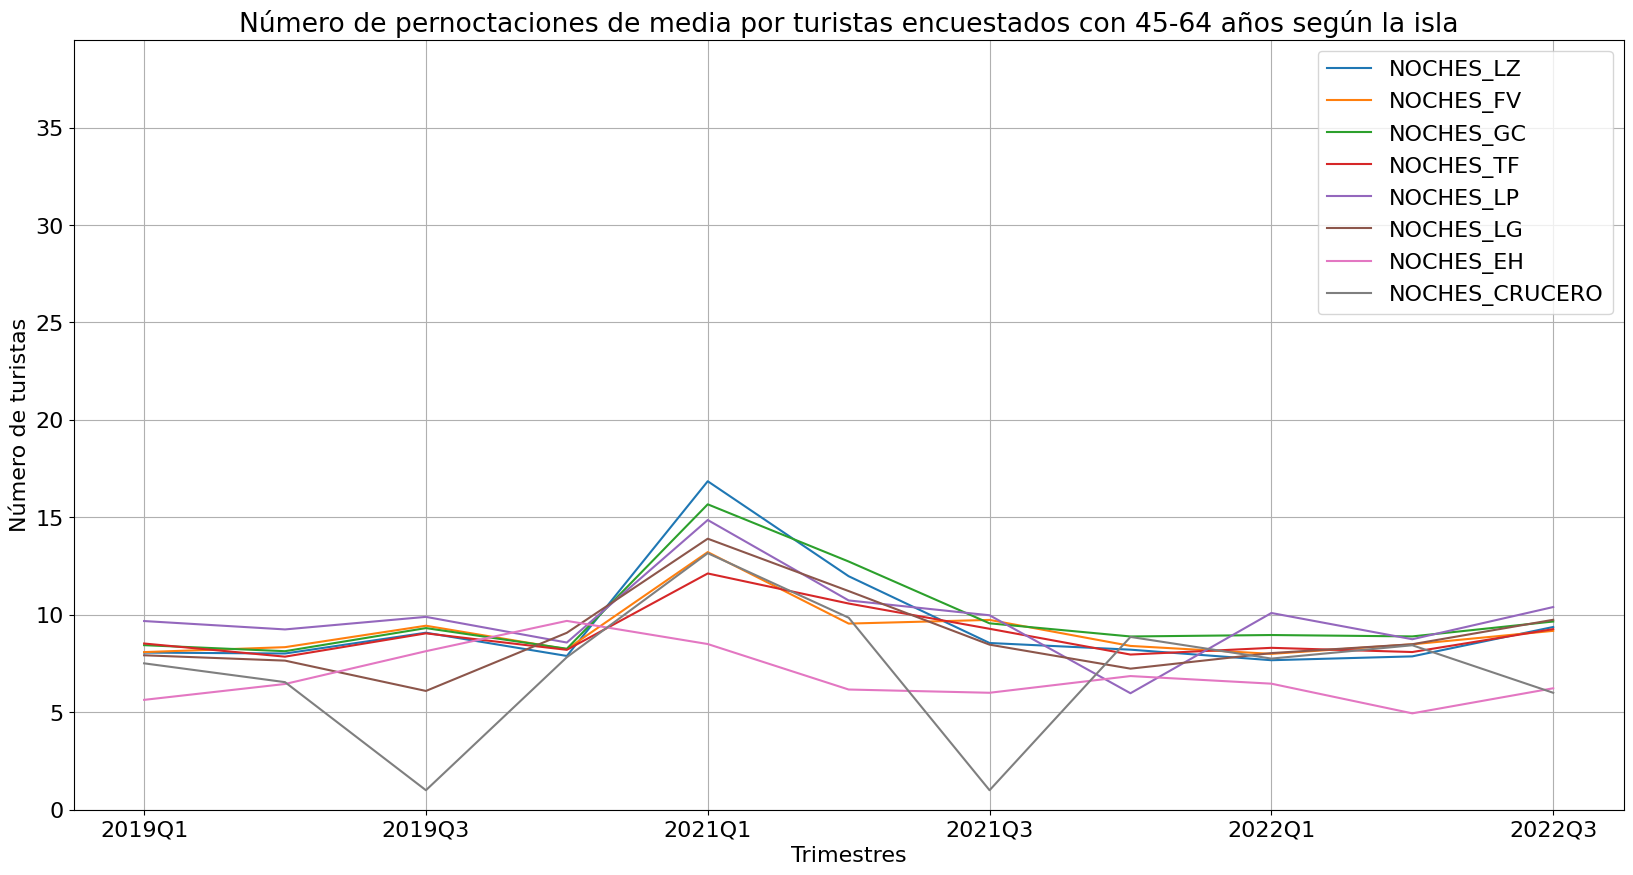

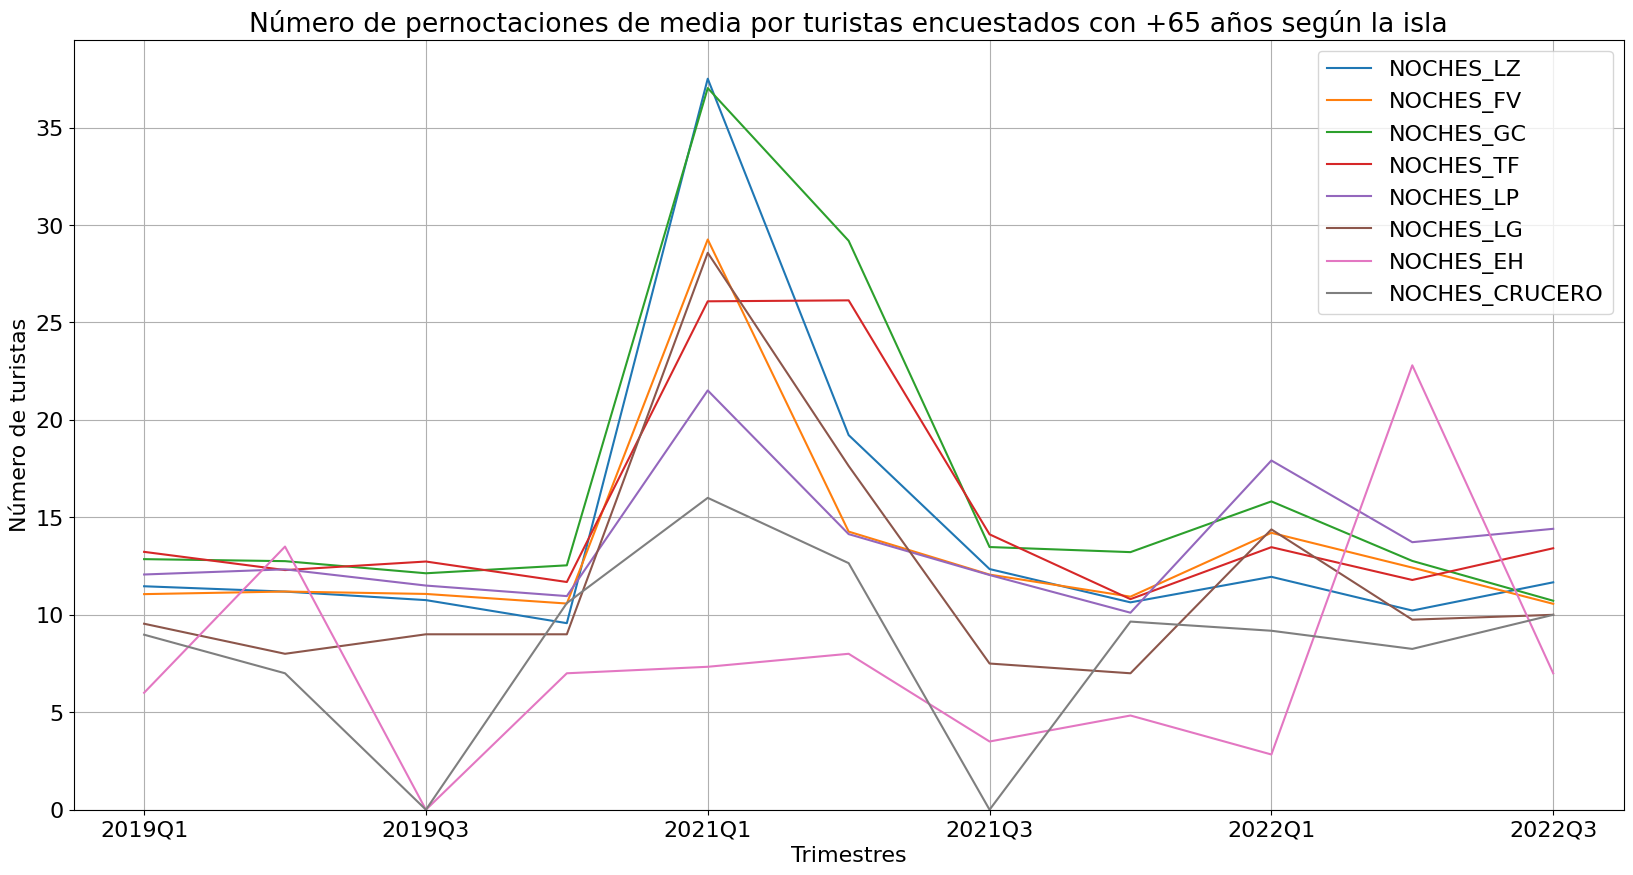

In [11]:
Trimester = main_df.TRIMESTRE.unique()
age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]
overnights_cols = ['NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF',
                   'NOCHES_LP', 'NOCHES_LG', 'NOCHES_EH', 'NOCHES_CRUCERO']

max_tourists = 0

main_df_copy = main_df.copy()
main_df_copy = main_df_copy.replace(0, np.NaN)

for pos_limit_ages in range(len(limit_ages)):
    result = {overnight: [] for overnight in overnights_cols}
    for time in Trimester:
        if pos_limit_ages == len(limit_ages)-1:
            query = (main_df_copy['TRIMESTRE'] == time) & (
                main_df_copy['EDAD'] > limit_ages[pos_limit_ages])
        else:
            query = (main_df_copy['TRIMESTRE'] == time) & (main_df_copy['EDAD'] > limit_ages[pos_limit_ages]) & (
                main_df_copy['EDAD'] <= limit_ages[pos_limit_ages+1])
        for overnight in overnights_cols:
            if (main_df_copy.loc[query, overnight].mean()) > max_tourists:
                max_tourists = main_df_copy.loc[query, overnight].mean()

for pos_limit_ages in range(len(limit_ages)):
    result = {overnight: [] for overnight in overnights_cols}
    for time in Trimester:
        if pos_limit_ages == len(limit_ages)-1:
            query = (main_df_copy['TRIMESTRE'] == time) & (
                main_df_copy['EDAD'] > limit_ages[pos_limit_ages])
        else:
            query = (main_df_copy['TRIMESTRE'] == time) & (main_df_copy['EDAD'] > limit_ages[pos_limit_ages]) & (
                main_df_copy['EDAD'] <= limit_ages[pos_limit_ages+1])
        for overnight in overnights_cols:
            result[overnight].append(main_df_copy.loc[query, overnight].mean())

    mean_overnights_df = pd.DataFrame(result, index=Trimester)
    mean_overnights_df = mean_overnights_df.replace(np.NaN, 0)

    lines = mean_overnights_df.plot.line(figsize=(20, 10))
    ax = plt.gca()
    ax.set_ylim([0, max_tourists+2])
    ax.set_title("Número de pernoctaciones de media por turistas encuestados con " +
                 age_ranges[pos_limit_ages] + " años según la isla")
    ax.set_xlabel("Trimestres")
    ax.set_ylabel("Número de turistas")
    ax.grid(True)
    ax.set_axisbelow(True)


# VER SI SE HA PRODUCIDO UN CAMBIO EN LA MEDIA DE NOCHES

# VER SI SE HA PRODUCIDO UN CAMBIO EN LAS ISLAS MAS VISITADAS

# MEDIA DE GASTO EN OTROS CONCEPTOS
# Polígono de frecuencias de otro gastos

           NOCHES_LZ  NOCHES_FV  NOCHES_GC  NOCHES_TF  NOCHES_LG  NOCHES_LP  \
TRIMESTRE                                                                     
2019Q1         14792      11919      25344      31095       1301       4214   
2019Q2         13618      10898      19059      25329        679       3912   
2019Q3         16109      13560      24930      31989        528       4218   
2019Q4         13606      11813      25204      30345       1201       3893   
2021Q1         21529      10914      31530      35697       2479       6415   
2021Q2          9034       7600      23231      39978       1283       5045   
2021Q3         12453      12574      27117      33460       1265       5971   
2021Q4         12154      13386      24200      27661        920       2708   
2022Q1         10709      11000      26435      27471       1534       5514   
2022Q2         11576      11818      21245      28283        859       4386   
2022Q3         19345      13647      26955      3766

<ipython-input-42-aa76d423673e>:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



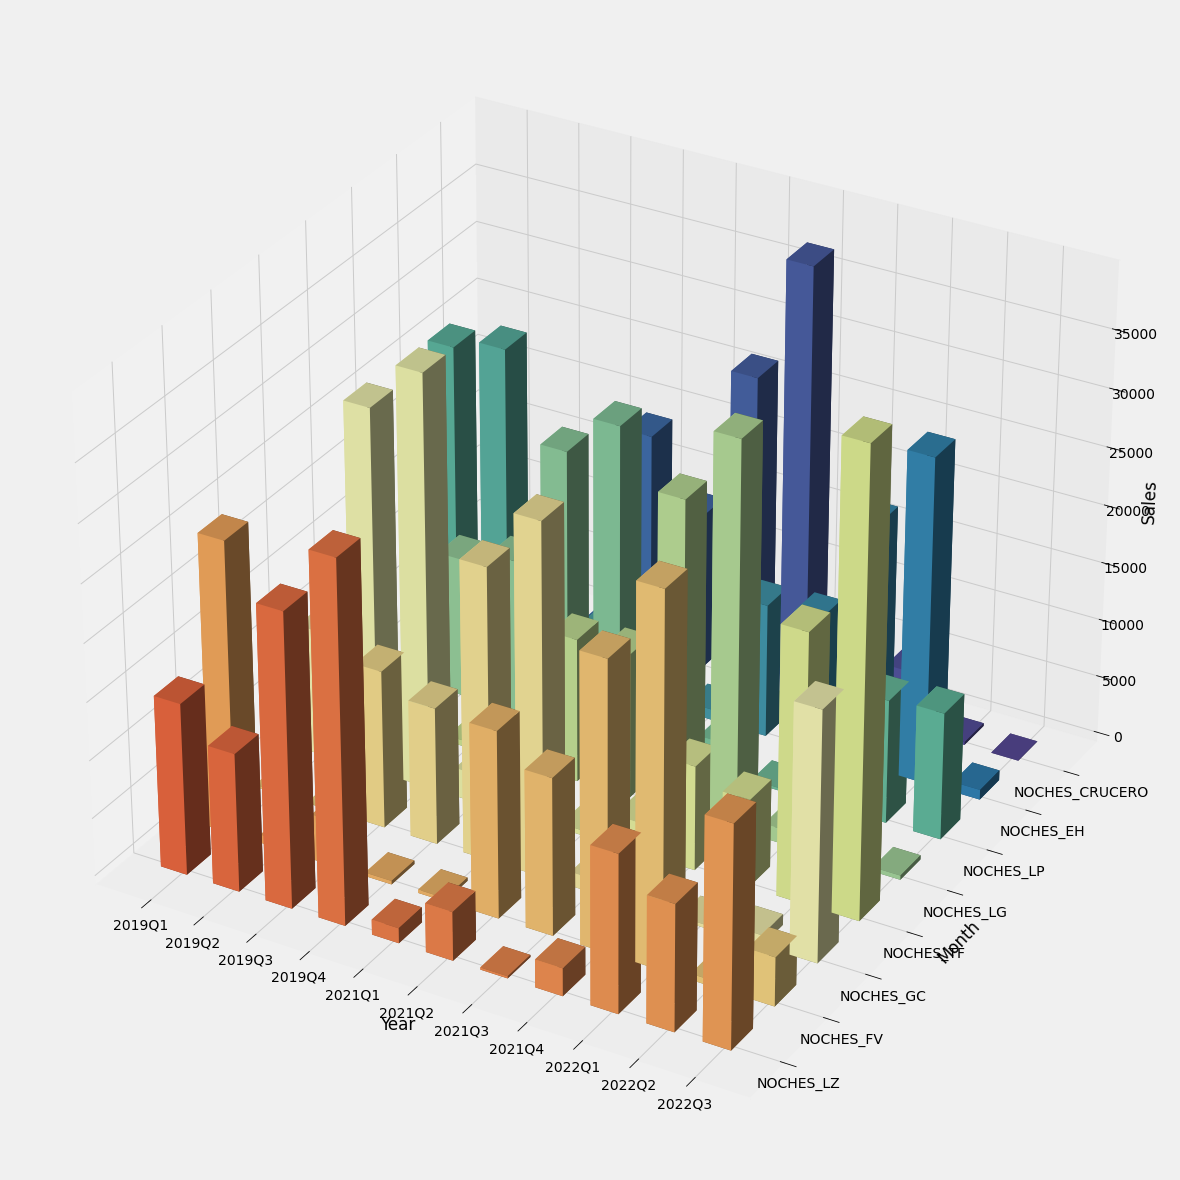

In [42]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style


new_df = main_df[['NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF', 'NOCHES_LG', 'NOCHES_LP', 'NOCHES_EH', 'NOCHES_CRUCERO', 'NOCHES', 'TRIMESTRE']].copy()
new_df = new_df.set_index('TRIMESTRE')

#PROBAR SI SUMA CORRECTAMENTE
new_df = new_df.groupby(new_df.index)['NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF', 'NOCHES_LG', 'NOCHES_LP', 'NOCHES_EH', 'NOCHES_CRUCERO'].sum()

print(new_df)

cosas_array = new_df[['NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_TF', 'NOCHES_LG', 'NOCHES_LP', 'NOCHES_EH', 'NOCHES_CRUCERO']].to_numpy()

print(cosas_array)

xlabels = new_df.index
ylabels = new_df.columns

print(xlabels)
print(ylabels)

x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])

print(x)
print(y)



z = np.vstack(cosas_array).ravel()

print(z)

# Set plotting style
plt.style.use('fivethirtyeight')

x_M, y_M = np.meshgrid(x, y, copy=False)

print("hola")
print(x_M)
print(y_M)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Cuadrar axis con su respectivo indice
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Dar a cada axis su respectivo indice
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)

# Labeling the 3 dimensions
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Sales')


# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.Spectral(values)
#ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors, alpha=0.2)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors)


# TREEMAP DEL TOTAL DE TIPO DE GASTO POR ISLA Y AÑO

In [19]:
# Limpiamos de los datos aquellos encuestaods que hayan estado en más de una isla
main_df_copy = main_df.copy()
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_TF'] > 0) & (
    main_df_copy['NOCHES_TF'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_LZ'] > 0) & (
    main_df_copy['NOCHES_LZ'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_FV'] > 0) & (
    main_df_copy['NOCHES_FV'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_GC'] > 0) & (
    main_df_copy['NOCHES_GC'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_EH'] > 0) & (
    main_df_copy['NOCHES_EH'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_LP'] > 0) & (
    main_df_copy['NOCHES_LP'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_LG'] > 0) & (
    main_df_copy['NOCHES_LG'] < main_df_copy['NOCHES'])].index, inplace=True)
main_df_copy.drop(main_df_copy[(main_df_copy['NOCHES_CRUCERO'] > 0) & (
    main_df_copy['NOCHES_CRUCERO'] < main_df_copy['NOCHES'])].index, inplace=True)

# Creamos columna Isla donde se representará la isla donde ha estado el turista
conditionlist = [
    (main_df_copy['NOCHES_TF'] > 0),
    (main_df_copy['NOCHES_LZ'] > 0),
    (main_df_copy['NOCHES_FV'] > 0),
    (main_df_copy['NOCHES_GC'] > 0),
    (main_df_copy['NOCHES_EH'] > 0),
    (main_df_copy['NOCHES_LP'] > 0),
    (main_df_copy['NOCHES_LG'] > 0),
    (main_df_copy['NOCHES_CRUCERO'] > 0)]
choicelist = ['TNF', 'LZ', 'FV', 'GC', 'EH', 'LP', 'LG', 'CRU']
main_df_copy['ISLA'] = np.select(
    conditionlist, choicelist, default='Not Specified')

# Cambiamos la , por un . de los valores de gasto para poder trabajar con ellos con el float
columns_to_replace = ['DESGLOSE_EXTRA_ALOJ', 'DESGLOSE_PASAJES_ISLAS', 'DESGLOSE_TAXI', 
                      'DESGLOSE_ALQ_VEHIC', 'DESGLOSE_TRANSP_PUBLICO', 'DESGLOSE_ALIM_SUPER', 
                      'DESGLOSE_RESTAURANT', 'DESGLOSE_EXCURS_ORGANIZ', 'DESGLOSE_DEPORTES', 
                      'DESGLOSE_ACTIV_CULTURAL', 'DESGLOSE_MUSEOS', 'DESGLOSE_PARQUES_OCIO', 
                      'DESGLOSE_DISCOTECAS', 'DESGLOSE_SALUD', 'DESGLOSE_SOUVENIRS', 
                      'DESGLOSE_BIENES_INMUEBLES', 'DESGLOSE_OTRAS_COMPRAS', 
                      'DESGLOSE_FARMACIA', 'DESGLOSE_OTROS_GASTOS']

main_df_copy[columns_to_replace] = main_df_copy[columns_to_replace].replace(',', '.', regex=True)

# Creamos dataframe con trimestre e isla
costs_df = main_df_copy[['TRIMESTRE', 'ISLA']]

# Creamos columna para cada tipo de gasto con su valor en euros
costs_df['ALOJAMIENTO_EXTRA'] = main_df_copy.DESGLOSE_EXTRA_ALOJ.astype(
    float) * main_df_copy.GASTO_EUROS.astype(float) / 100
costs_df['TRANSPORTE'] = (main_df_copy.DESGLOSE_PASAJES_ISLAS.astype(float) + main_df_copy.DESGLOSE_TAXI.astype(float) +
                          main_df_copy.DESGLOSE_TRANSP_PUBLICO.astype(float) + main_df_copy.DESGLOSE_ALQ_VEHIC.astype(float)) * main_df_copy.GASTO_EUROS.astype(float) / 100
costs_df['ALIMENTACION'] = (main_df_copy.DESGLOSE_ALIM_SUPER.astype(
    float) + main_df_copy.DESGLOSE_RESTAURANT.astype(float)) * main_df_copy.GASTO_EUROS.astype(float) / 100
costs_df['OCIO'] = (main_df_copy.DESGLOSE_EXCURS_ORGANIZ.astype(float) + main_df_copy.DESGLOSE_DEPORTES.astype(float) + main_df_copy.DESGLOSE_ACTIV_CULTURAL.astype(float) + main_df_copy.DESGLOSE_MUSEOS.astype(
    float) + main_df_copy.DESGLOSE_PARQUES_OCIO.astype(float) + main_df_copy.DESGLOSE_DISCOTECAS.astype(float) + main_df_copy.DESGLOSE_SALUD.astype(float)) * main_df_copy.GASTO_EUROS.astype(float) / 100
costs_df['COMPRA_BIENES'] = (main_df_copy.DESGLOSE_SOUVENIRS.astype(float) + main_df_copy.DESGLOSE_BIENES_INMUEBLES.astype(
    float) + main_df_copy.DESGLOSE_OTRAS_COMPRAS.astype(float)) * main_df_copy.GASTO_EUROS.astype(float) / 100
costs_df['OTROS'] = (main_df_copy.DESGLOSE_FARMACIA.astype(
    float) + main_df_copy.DESGLOSE_OTROS_GASTOS.astype(float)) * main_df_copy.GASTO_EUROS.astype(float) / 100

# Convertimos las columnas creadas en valores dentro de dos columnas
costs_treemap_df = costs_df.melt(id_vars=["TRIMESTRE", "ISLA"],
                                 var_name="TIPO_GASTO",
                                 value_name="GASTO")

# Quitamos las filas cuyo gasto sea 0 para no representarlas
costs_treemap_df = costs_treemap_df[costs_treemap_df['GASTO'] != 0]

# Quitamos los trimestres para trabajar con años
costs_treemap_df['TRIMESTRE'] = costs_treemap_df['TRIMESTRE'].str.split(
    'Q').str[0]

Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))

color_map = {
    'LG': '#19d3f3',
    'LZ': '#ab63fa',
    'GC': '#00cc96',
    'FV': '#ffa15a',
    'TNF': '#636efa',
    'LP': '#ef553b',
    'EH': '#ff6692',
    'CRU': '#b6e880'
}

df_colors = pd.DataFrame.from_dict(
    color_map, orient='index', columns=['COLOR'])

# Unir el DataFrame de colores con el DataFrame original por la columna ISLA
costs_treemap_df = costs_treemap_df.merge(
    df_colors, left_on='ISLA', right_index=True, how='left')

# Representamos treemap de cada año

for time in Years:
    fig = px.treemap(costs_treemap_df[costs_treemap_df['TRIMESTRE'] == time],
                     path=['TRIMESTRE', 'ISLA', 'TIPO_GASTO'],
                     values='GASTO'
                     )
    fig.update_layout(title_text='Diagrama de árbol con el total gastado en cada tipo de gasto en cada isla en ' + time,
                      font=dict(
                          size=16
                      ))

    fig.for_each_trace(
        lambda t: t.update(
            marker_colors=[
                color_map.get(
                    id.split("/")[1], None) if len(id.split("/")) > 1 else None
                for id in t.ids
            ]
        )
    )

    fig.data[0].textinfo = 'label+value'
    fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# TREEMAP DE MEDIA DE TIPO DE GASTO POR ISLA Y AÑO

In [20]:
costs_treemap_df = costs_treemap_df.groupby(
    ["TRIMESTRE", "ISLA", "TIPO_GASTO"], as_index=False)["GASTO"].mean()

Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))
Countries = main_df.PAIS_RESIDENCIA.unique()

# Quitamos los trimestres para trabajar con años
costs_treemap_df['TRIMESTRE'] = costs_treemap_df['TRIMESTRE'].str.split(
    'Q').str[0]

Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))
print(Years)

# Representamos treemap de cada año

color_map = {
    'LG': '#19d3f3',
    'LZ': '#ab63fa',
    'GC': '#00cc96',
    'FV': '#ffa15a',
    'TNF': '#636efa',
    'LP': '#ef553b',
    'EH': '#ff6692',
    'CRU': '#b6e880'
}

color_df = pd.DataFrame.from_dict(color_map, orient='index', columns=['COLOR'])

# Unir el DataFrame de colores con el DataFrame original por la columna ISLA
costs_treemap_df = costs_treemap_df.merge(
    color_df, left_on='ISLA', right_index=True, how='left')
print(costs_treemap_df)

for time in Years:
    fig = px.treemap(costs_treemap_df[costs_treemap_df['TRIMESTRE'] == time],
                     path=['TRIMESTRE', 'ISLA', 'TIPO_GASTO'],
                     values='GASTO',
                     color='COLOR',
                     )
    fig.update_layout(title_text='Diagrama de árbol con la media de gasto según el tipo de gasto en cada isla en ' + time, font=dict(
        size=16
    ))
    fig.for_each_trace(
        lambda t: t.update(
            marker_colors=[
                color_map.get(
                    id.split("/")[1], None) if len(id.split("/")) > 1 else None
                for id in t.ids
            ]
        )
    )
    fig.data[0].textinfo = 'label+value'

    fig.show()


['2019', '2021', '2022']
    TRIMESTRE ISLA         TIPO_GASTO       GASTO    COLOR
0        2019  CRU       ALIMENTACION  105.125813  #b6e880
1        2019  CRU  ALOJAMIENTO_EXTRA  246.432947  #b6e880
2        2019  CRU      COMPRA_BIENES  176.006502  #b6e880
3        2019  CRU               OCIO  219.989045  #b6e880
4        2019  CRU              OTROS  160.054136  #b6e880
..        ...  ...                ...         ...      ...
139      2022  TNF  ALOJAMIENTO_EXTRA  256.922005  #636efa
140      2022  TNF      COMPRA_BIENES  295.591059  #636efa
141      2022  TNF               OCIO  260.888962  #636efa
142      2022  TNF              OTROS  117.720557  #636efa
143      2022  TNF         TRANSPORTE  271.794606  #636efa

[144 rows x 5 columns]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

['GBR826' 'IRL372' 'FRA250' 'ESP724' 'DEU276' 'ZZZ900' 'NLD528' 'CHE756'
 'ITA380' 'BEL056' 'NOR578' 'DNK208' 'SWE752' 'FIN246']
['2019', '2021', '2022']
[[10582  1426  1714  7065  6907  2934  1545   592  1354  1053   903   735
   1364   587]
 [ 4573   585  2594 10749  5934  3703  1255   756  1166   966   395   484
    882   221]
 [ 7315  1136  1518  7127  4482  2192  1463   364   943   846   522   538
    688   243]]
[[499.94    700.      500.      410.04    437.649   518.36385 549.9
  600.      420.0104  500.      659.3153  501.1114  477.5952  636.1314 ]
 [600.04    807.66    666.89435 450.      600.18    666.4216  657.2347
  737.41    594.93    633.5526  799.96    606.76    673.93    739.9216 ]
 [600.      885.0626  669.693   500.04    610.83735 646.04405 726.4419
  700.      600.04    600.04    890.87405 674.1     700.      800.1    ]]
prueba: 
[10582  1426  1714  7065  6907  2934  1545   592  1354  1053   903   735
  1364   587  4573   585  2594 10749  5934  3703  1255   756  1166

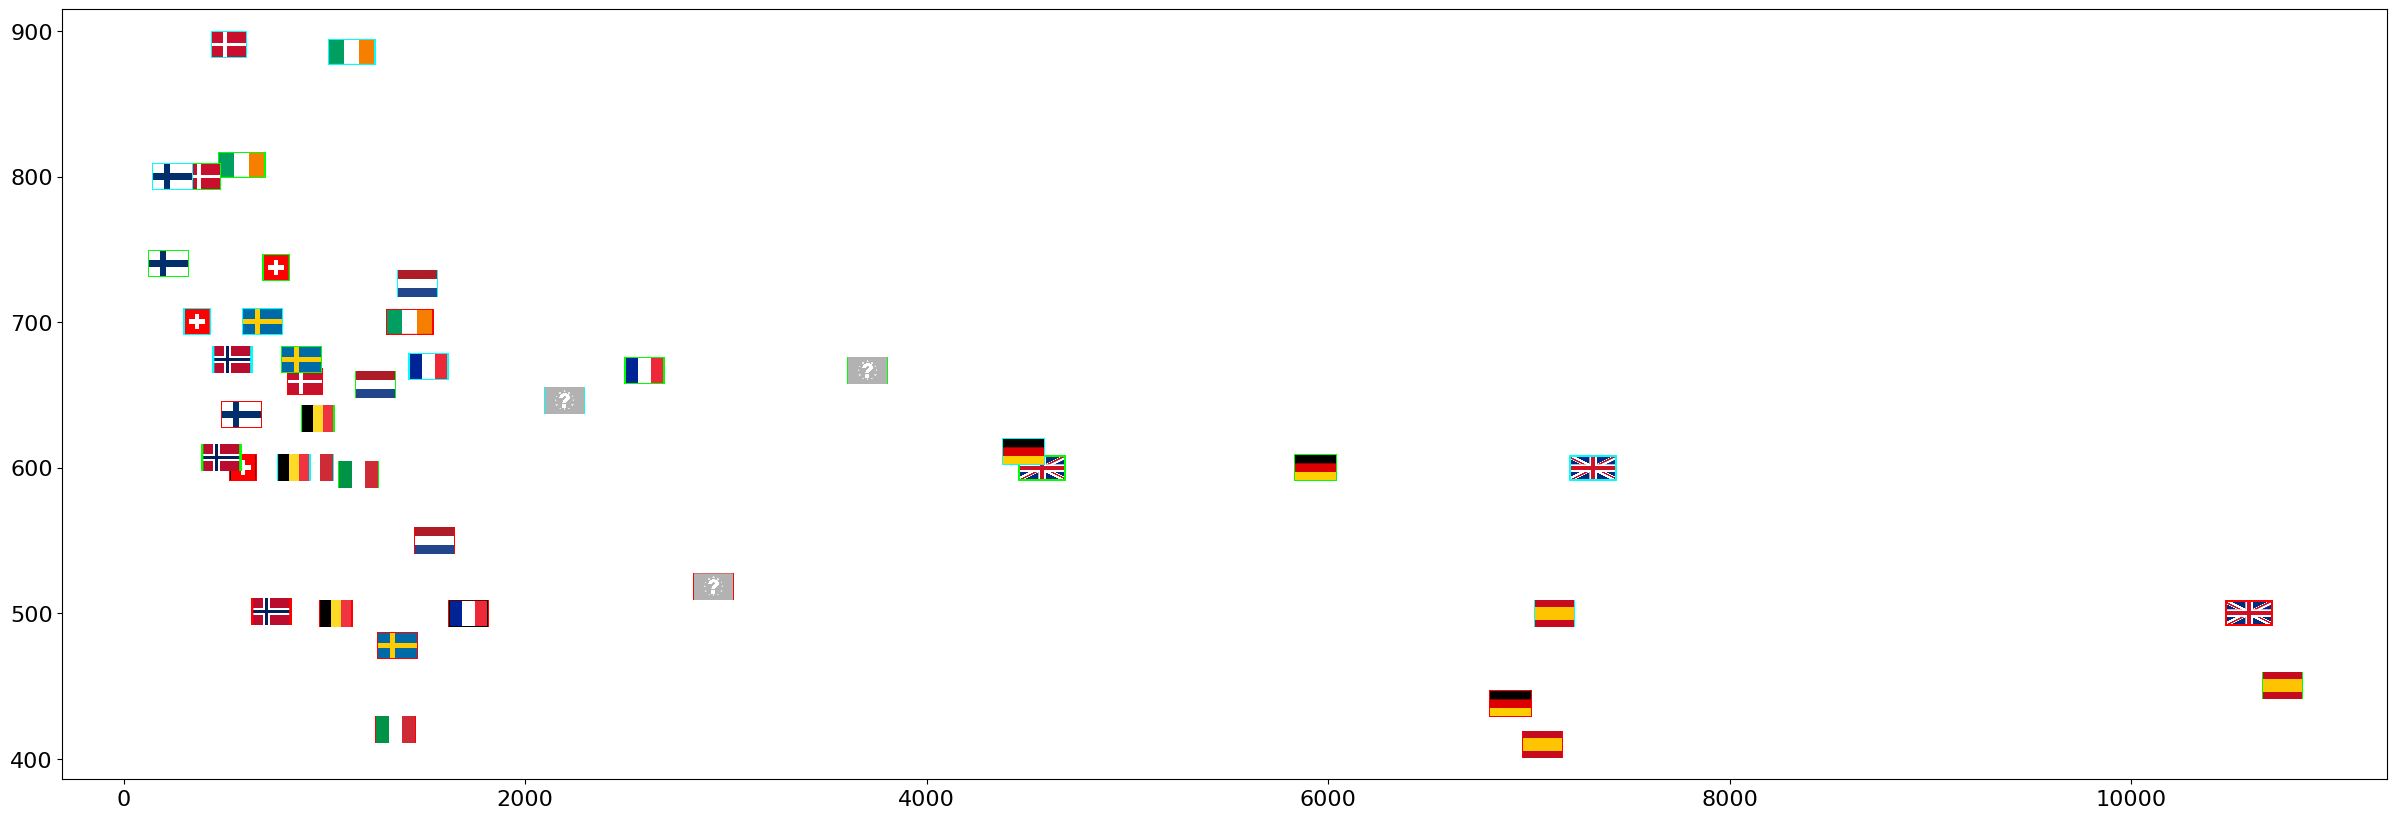

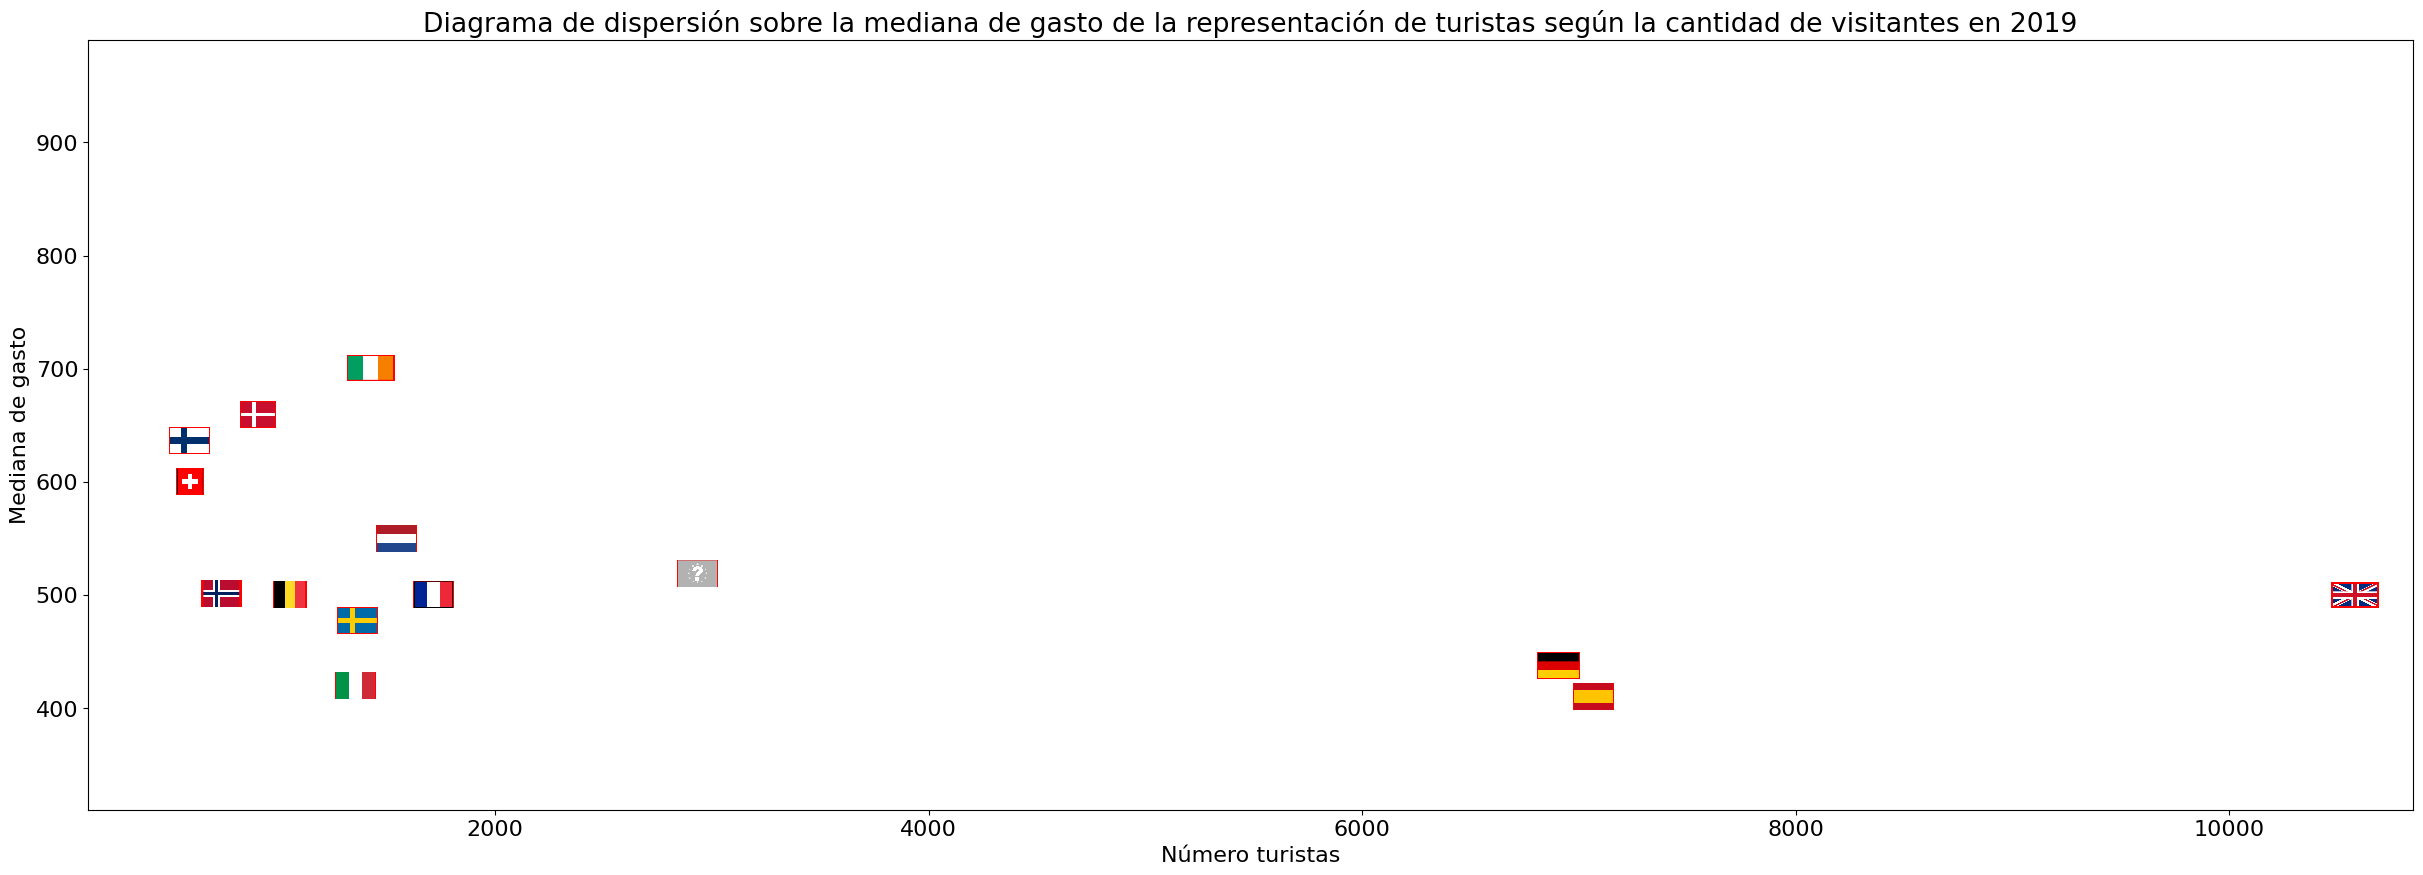

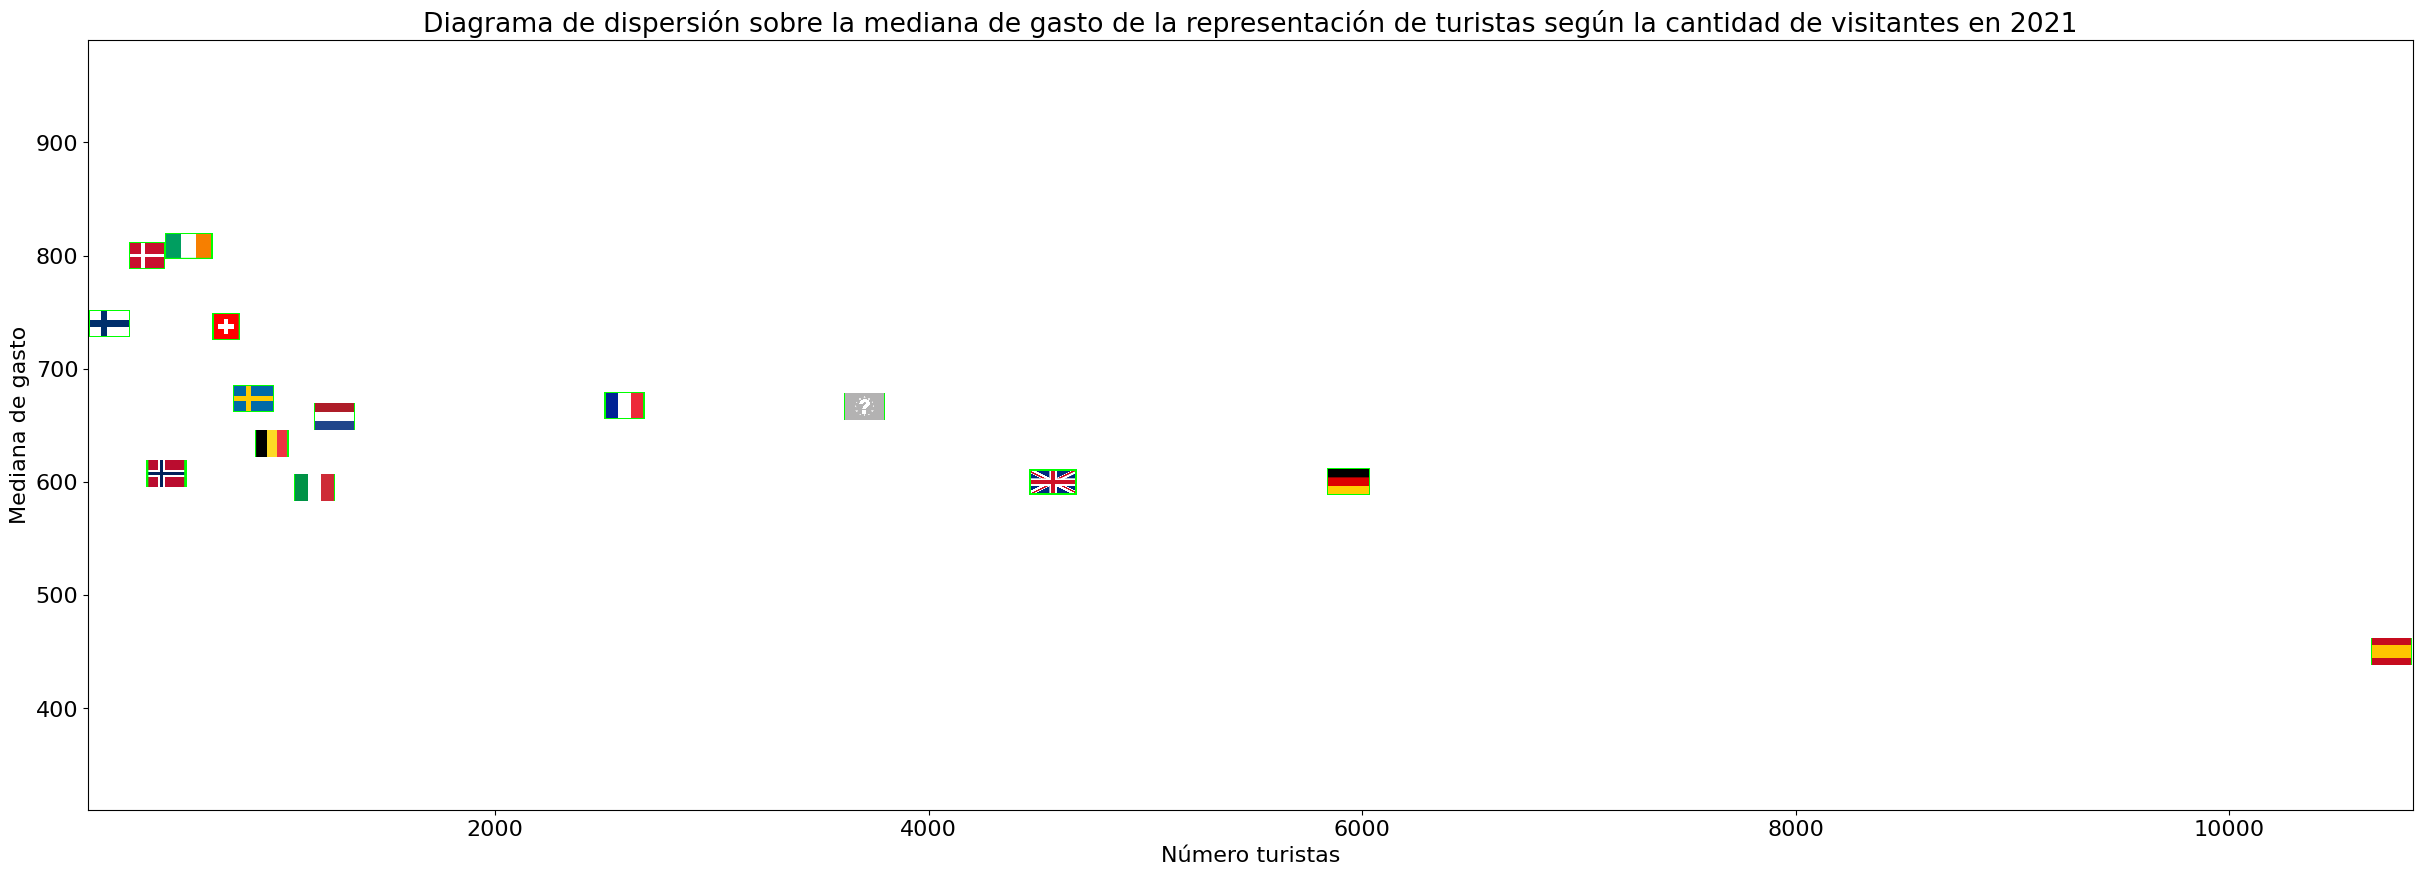

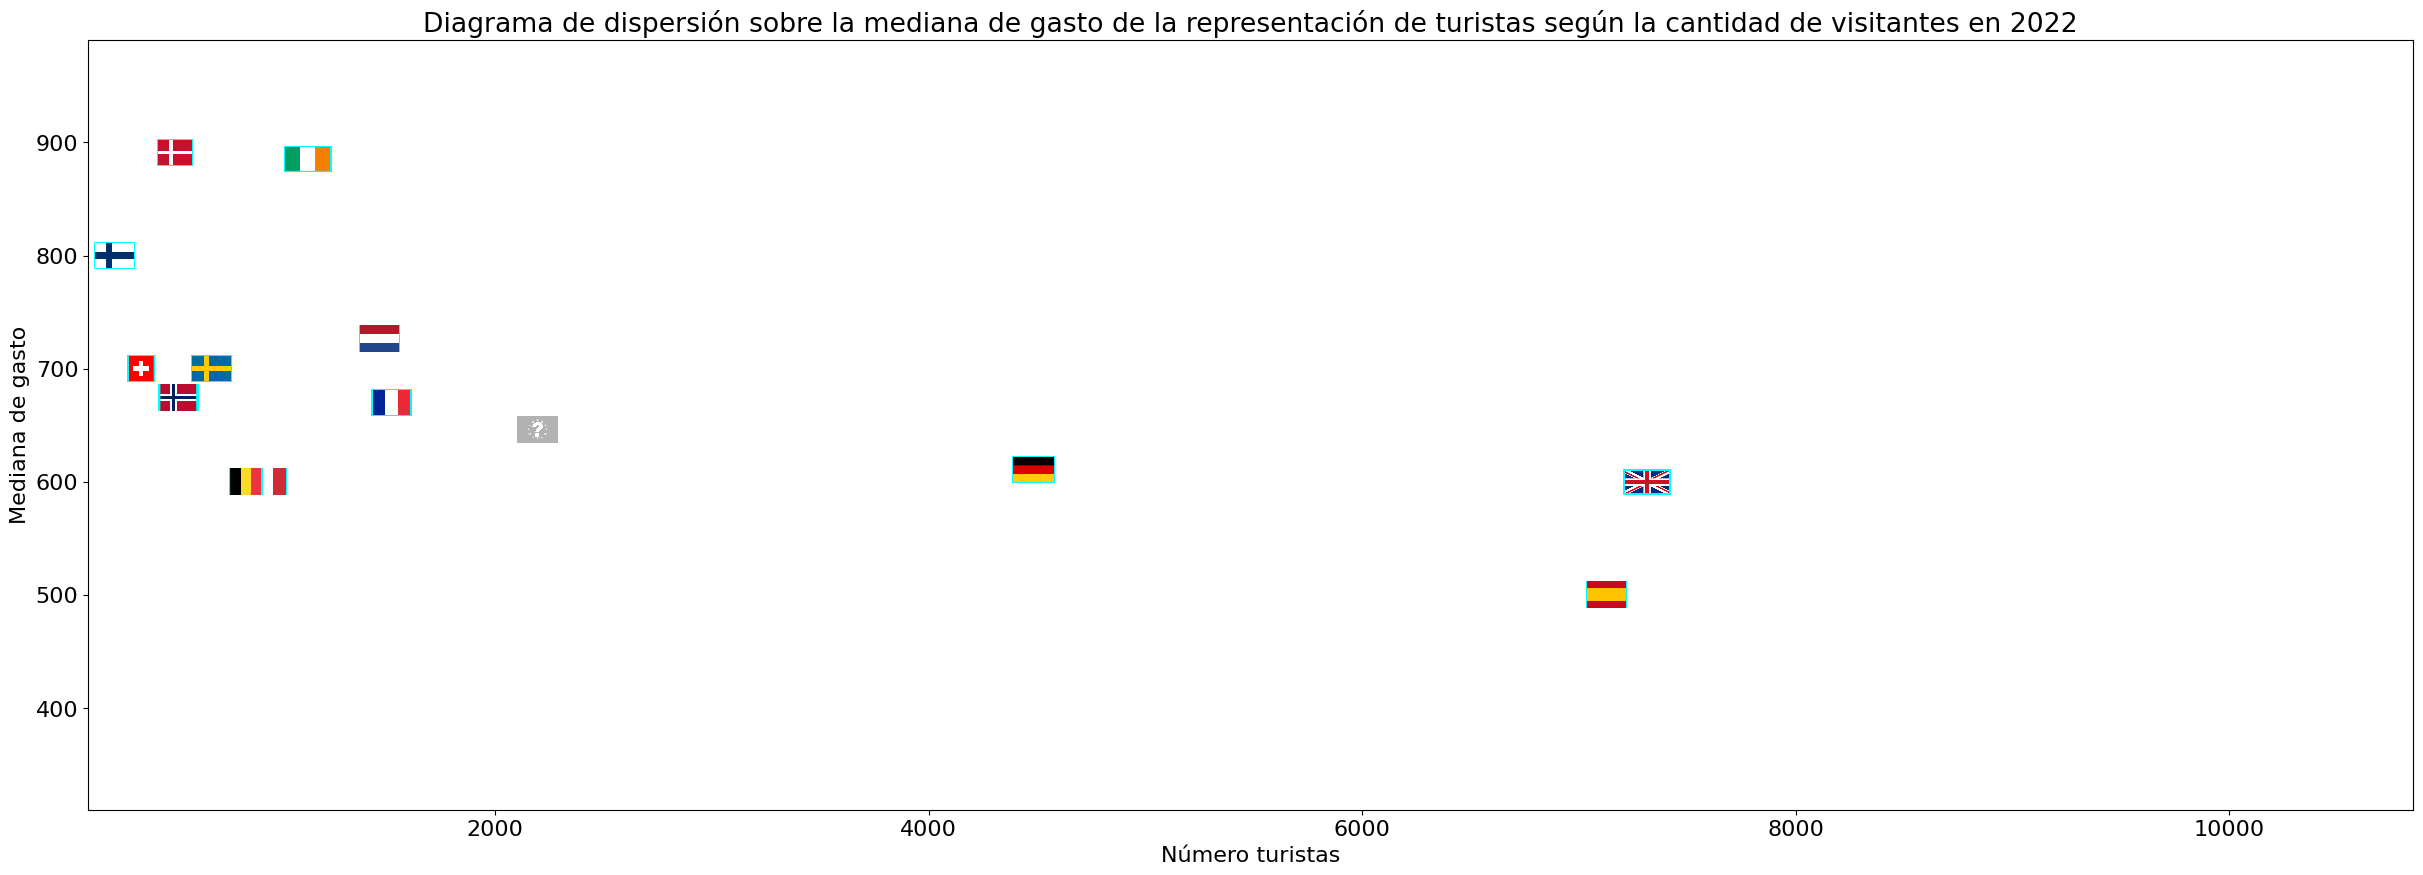

In [21]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=0.015):
    return OffsetImage(plt.imread(path), zoom=0.04)

paths = [[
    './src/bandera/UK_2019.png',
    './src/bandera/Ireland_2019.png',
    './src/bandera/France_2019.png',
    './src/bandera/Spain_2019.png',
    './src/bandera/Germany_2019.png',
    './src/bandera/Unknown_2019.png',
    './src/bandera/Netherlands_2019.png',
    './src/bandera/Switzerland_2019.png',
    './src/bandera/Italy_2019.png',
    './src/bandera/Belgium_2019.png',
    './src/bandera/Denmark_2019.png',
    './src/bandera/Norway_2019.png',
    './src/bandera/Sweden_2019.png',
    './src/bandera/Finland_2019.png'],[
    './src/bandera/UK_2021.png',
    './src/bandera/Ireland_2021.png',
    './src/bandera/France_2021.png',
    './src/bandera/Spain_2021.png',
    './src/bandera/Germany_2021.png',
    './src/bandera/Unknown_2021.png',
    './src/bandera/Netherlands_2021.png',
    './src/bandera/Switzerland_2021.png',
    './src/bandera/Italy_2021.png',
    './src/bandera/Belgium_2021.png',
    './src/bandera/Denmark_2021.png',
    './src/bandera/Norway_2021.png',
    './src/bandera/Sweden_2021.png',
    './src/bandera/Finland_2021.png'],[
    './src/bandera/UK_2022.png',
    './src/bandera/Ireland_2022.png',
    './src/bandera/France_2022.png',
    './src/bandera/Spain_2022.png',
    './src/bandera/Germany_2022.png',
    './src/bandera/Unknown_2022.png',
    './src/bandera/Netherlands_2022.png',
    './src/bandera/Switzerland_2022.png',
    './src/bandera/Italy_2022.png',
    './src/bandera/Belgium_2022.png',
    './src/bandera/Denmark_2022.png',
    './src/bandera/Norway_2022.png',
    './src/bandera/Sweden_2022.png',
    './src/bandera/Finland_2022.png']]

Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))
Countries = main_df.PAIS_RESIDENCIA.unique()

print(Countries)

zeros_array = np.zeros( (len(Years), len(Countries)), dtype=int )
z = np.zeros( (len(Years), len(Countries)), dtype=float )
print(Years)

nuevo_df = main_df.copy()
nuevo_df['GASTO_EUROS']=nuevo_df['GASTO_EUROS'].astype(float)

x = 0
for pais in Countries:
  y = 0
  for time in Years:
    zeros_array[y][x] = len(nuevo_df[(nuevo_df.PAIS_RESIDENCIA == pais) & (nuevo_df.TRIMESTRE.str.contains(time))])
    #CAMBIAR TOTAL POR MEDIA EN EL GASTO
    #z[y][x] = nuevo_df.loc[(nuevo_df.PAIS_RESIDENCIA == pais) & (nuevo_df.TRIMESTRE.str.contains(time)), 'GASTO_EUROS'].mean()
    z[y][x] = nuevo_df.loc[(nuevo_df.PAIS_RESIDENCIA == pais) & (nuevo_df.TRIMESTRE.str.contains(time)), 'GASTO_EUROS'].median()
    y += 1
  x += 1

print(zeros_array)
print(z)

test = np.concatenate((zeros_array), axis=None)
test2 = np.concatenate((z), axis=None)
test3 = np.concatenate((paths), axis=None)
print("prueba: ")
print(test)
print(test2)
print(test3)

max_x = np.max(test) 
min_x = np.min(test) 
max_y = np.max(test2) 
min_y = np.min(test2) 

print(max_x)
print(max_y)

# Todos los años juntos en una misma grafica
fig, ax = plt.subplots(figsize=(30, 10))
x = test
y = test2
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,test3):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Cada año su propia grafica
for iter in range(3):
  fig, ax = plt.subplots(figsize=(30, 10))
  x = zeros_array[iter]
  y = z[iter]
  ruta=paths[iter]
  ax.scatter(x, y) 
  ax.set_title("Diagrama de dispersión sobre la mediana de gasto de la representación de turistas según la cantidad de visitantes en " + Years[iter])
  ax.set_xlabel("Número turistas")
  ax.set_ylabel("Mediana de gasto")
  ax.set_xlim([min_x - 100, max_x + 100])
  ax.set_ylim([min_y - 100, max_y + 100])

  for x0, y0, path in zip(x, y,ruta):
      ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
      ax.add_artist(ab)



In [22]:
age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]

Countries = main_df.PAIS_RESIDENCIA.unique()
Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))

for time in Years:
  for pos in range(len(limit_ages)):
    new_arrays = []
    old_arrays = []
    total = []
    mediana_gasto_new = []
    mediana_gasto_old = []
    mediana_gasto_total = []
    for pais in Countries:
      if pos < (len(limit_ages))-1:
        new_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])]))
        old_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])]))
        total.append(len(main_df[(main_df.TRIMESTRE.str.contains(time))  & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])]))
        mediana_gasto_new.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1]), 'GASTO_EUROS'].median())
        mediana_gasto_old.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1]), 'GASTO_EUROS'].median())
        mediana_gasto_total.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1]), 'GASTO_EUROS'].median())
      else:
        new_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        old_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        total.append(len(main_df[(main_df.TRIMESTRE.str.contains(time))  & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        mediana_gasto_new.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.EDAD > limit_ages[pos]), 'GASTO_EUROS'].median())
        mediana_gasto_old.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.EDAD > limit_ages[pos]), 'GASTO_EUROS'].median())
        mediana_gasto_total.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.EDAD > limit_ages[pos]), 'GASTO_EUROS'].median())

    d = {'Paises': Countries,
        'NUEVOS': new_arrays,
        'REPETIDORES': old_arrays,
        'MEDIANA_GASTO_NUEVO': mediana_gasto_new,
        'MEDIANA_GASTO_REPE': mediana_gasto_old,
        'MEDIANA_GASTO_TOTAL': mediana_gasto_total,
        'TOTAL': total}

    df = pd.DataFrame(d)
    
    df[['MEDIANA_GASTO_NUEVO', 'MEDIANA_GASTO_REPE']] = df[['MEDIANA_GASTO_NUEVO', 'MEDIANA_GASTO_REPE']].round(2)

    df['MEDIANA_GASTO_NUEVO'] = df['MEDIANA_GASTO_NUEVO'].apply(lambda x: str(x) + ' €')
    df['MEDIANA_GASTO_REPE'] = df['MEDIANA_GASTO_REPE'].apply(lambda x: str(x) + ' €')


    df['NUEVOS'] = (df['NUEVOS'] / df['TOTAL'])*100
    df['REPETIDORES'] = (df['REPETIDORES'] / df['TOTAL'])*100

    df = df.sort_values(by=(['MEDIANA_GASTO_TOTAL']), ascending=False)

    fig = go.Figure(layout_yaxis_range=[0,100])
    fig.add_trace(go.Bar(x=df['Paises'],
                          y=df['NUEVOS'],
                          orientation='v',
                          name='NUEVOS',
                          #texttemplate = "%{df[MEDIANA_GASTO_NUEVO]:$,s}",
                          text=df['MEDIANA_GASTO_NUEVO'],
                          hovertemplate = "%{y}: %{x}"))
    fig.add_trace(go.Bar(x= df['Paises'],
                          y =df['REPETIDORES'],
                          orientation='v',
                          name= 'REPETIDORES',
                          #texttemplate=str(str(df['MEDIANA_GASTO_REPE']) + "€"),
                          text=df['MEDIANA_GASTO_REPE'],
                          hovertemplate="%{y}: %{x}"))    

    fig.update_layout(barmode='relative', 
                      bargap=0.01,
                      title= "Porcentaje de turistas nuevos y repetidores entre " + age_ranges[pos] + " en " + str(time),font=dict(
        size=16
    )
                    )
    fig.show()



    fig = px.bar(df, y=df['TOTAL'], x=df['Paises'], text_auto='.2s',
                title="Visualización del número de encuestados según su país de residencia entre " + age_ranges[pos] + " en " + str(time))
    fig.update_layout(font=dict(
        size=16
    ))
    fig.show()


    #Representación de preferencia de islas de los turistas usando Folium


    df=df.head(3)

    islands = ['TFN', 'LZ', 'FV', 'GC', 'EH', 'LP', 'LG']
    noches_islas = ['NOCHES_TF', 'NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_EH', 'NOCHES_LP', 'NOCHES_LG']

    for paises_higher_media in df.Paises.values:
      count_turist = []
      for isla in noches_islas:
        count_turist.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df[isla] > 0) & (main_df.PAIS_RESIDENCIA == paises_higher_media)]))

      d = {'Isla': islands, 'Total_isla': count_turist}
      state_data = pd.DataFrame(data=d)

      m = folium.Map(location=[28, -16], zoom_start=8, min_zoom = 8, max_zoom = 8)

      folium.Choropleth(
          geo_data='/content/drive/MyDrive/AHORA/datos/data.json',
          name="choropleth",
          data=state_data,
          columns=["Isla", "Total_isla"],
          key_on="feature.id",
          fill_color="BuPu",
          fill_opacity=0.7,
          line_opacity=0.2,
          legend_name="Total de turistas",
      ).add_to(m)

      folium.LayerControl().add_to(m)
      print(paises_higher_media)
      display(m)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# HACER MISMA GRÁFICA QUE ARRIBA PERO EN VEZ DE ORDENAR POR MEDIANA DE GASTO, ORDENAR POR TOTAL DE TURISTA (EJEMPLO EN 2019 ELEGIR UK, ESP Y GER)

In [47]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]

Trimester = main_df.TRIMESTRE.unique()
Countries = main_df.PAIS_RESIDENCIA.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))


count_ages.append(((main_df.TRIMESTRE.str.contains(time)) & (main_df.EDAD > limit_ages[pos])).sum())

max = 0

for time in Years:
  media_gasto = []
  for pais in Countries:
    if (len(main_df[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time))])) > max:
      max = (len(main_df[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time))]))


for time in Years:
  new_arrays = []
  old_arrays = []
  media_gasto = []
  for pos in range(len(limit_ages)):
    for pais in Countries:
      if pos < (len(limit_ages))-1:
        new_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos])]))
        old_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos])]))
        media_gasto.append(len(main_df[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos])]))
      else:
        new_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        old_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        media_gasto.append(len(main_df[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time) & (main_df.EDAD > limit_ages[pos])]))



    d = {'Paises': Countries,
        'NUEVOS': new_arrays,
        'REPETIDORES': old_arrays,
        'MEDIA_GASTO': media_gasto}

    df = pd.DataFrame(d)
    df = df.sort_values(by=['MEDIA_GASTO'], ascending=False)
    df = df.head(3)
    print(df)

  #EXCLUIR OTROS PAISES(ZZZ900)

    fig = go.Figure(layout_xaxis_range=[0,max+100])
    fig.add_trace(go.Bar(x=df['NUEVOS'],
                          y=df['Paises'],
                          orientation='h',
                          name='NUEVOS',
                          hovertemplate = "%{y}: %{x}"))
    fig.add_trace(go.Bar(x= df['REPETIDORES'],
                          y =df['Paises'],
                          orientation='h',
                          name= 'REPETIDORES',
                          hovertemplate="%{y}: %{x}"))    

    fig.update_layout(barmode='relative', 
                      yaxis_autorange='reversed',
                      bargap=0.01,
                    )
    print(time)
    fig.show()

  #-----------------------------------------------------------------------------------------------
  #hacer solo de repetidores por isla


    df_n_isla_pais = main_df
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_TF'] > 0) & (df_n_isla_pais['NOCHES_TF'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_LZ'] > 0) & (df_n_isla_pais['NOCHES_LZ'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_FV'] > 0) & (df_n_isla_pais['NOCHES_FV'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_GC'] > 0) & (df_n_isla_pais['NOCHES_GC'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_EH'] > 0) & (df_n_isla_pais['NOCHES_EH'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_LP'] > 0) & (df_n_isla_pais['NOCHES_LP'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_LG'] > 0) & (df_n_isla_pais['NOCHES_LG'] < df_n_isla_pais['NOCHES'])].index, inplace=True)
    df_n_isla_pais.drop(df_n_isla_pais[(df_n_isla_pais['NOCHES_CRUCERO'] > 0)].index, inplace=True)

  # Creamos columna Isla donde se representará la isla donde ha estado el turista
    conditionlist = [
      (df_n_isla_pais['NOCHES_TF'] > 0),
      (df_n_isla_pais['NOCHES_LZ'] > 0),
      (df_n_isla_pais['NOCHES_FV'] > 0),
      (df_n_isla_pais['NOCHES_GC'] > 0),
      (df_n_isla_pais['NOCHES_EH'] > 0),
      (df_n_isla_pais['NOCHES_LP'] > 0),
      (df_n_isla_pais['NOCHES_LG'] > 0)]
    islands = ['TFN', 'LZ', 'FV', 'GC', 'EH', 'LP', 'LG']
    df_n_isla_pais['ISLA'] = np.select(conditionlist, islands, default='Not Specified')

    df_n_isla_pais = df_n_isla_pais[['TRIMESTRE', 'ISLA', 'PAIS_RESIDENCIA']]
    print(df_n_isla_pais)

    b=df.Paises.values
    for paises_higher_media in b:
      count_turist = []
      for isla in islands:
        count_turist.append(len(df_n_isla_pais[(df_n_isla_pais.TRIMESTRE.str.contains(time)) & (df_n_isla_pais.ISLA == isla) & (df_n_isla_pais.PAIS_RESIDENCIA == paises_higher_media)]))

      d = {'Isla': islands, 'Media': count_turist}
      state_data = pd.DataFrame(data=d)

      m = folium.Map(location=[28, -16], zoom_start=8, min_zoom = 8, max_zoom = 8)

      folium.Choropleth(
          geo_data='/content/drive/MyDrive/AHORA/datos/data.json',
          name="choropleth",
          data=state_data,
          columns=["Isla", "Media"],
          key_on="feature.id",
          fill_color="BuPu",
          fill_opacity=0.7,
          line_opacity=0.2,
          legend_name="Total de turistas",
      ).add_to(m)

      folium.LayerControl().add_to(m)
      print(paises_higher_media)
      display(m)

SyntaxError: ignored

In [ ]:
age_ranges = ['16-24', '25-44', '45-64', '+65']
limit_ages = [15, 24, 44, 64]

Countries = main_df.PAIS_RESIDENCIA.unique()
Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))

for time in Years:
  for pos in range(len(limit_ages)):
    new_arrays = []
    old_arrays = []
    total = []
    mediana_gasto_new = []
    mediana_gasto_old = []
    mediana_gasto_total = []
    for pais in Countries:
      if pos < (len(limit_ages))-1:
        new_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])]))
        old_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])]))
        total.append(len(main_df[(main_df.TRIMESTRE.str.contains(time))  & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1])]))
        mediana_gasto_new.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1]), 'GASTO_EUROS'].median())
        mediana_gasto_old.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1]), 'GASTO_EUROS'].median())
        mediana_gasto_total.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.EDAD > limit_ages[pos]) & (main_df.EDAD <= limit_ages[pos+1]), 'GASTO_EUROS'].median())
      else:
        new_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        old_arrays.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        total.append(len(main_df[(main_df.TRIMESTRE.str.contains(time))  & (main_df.PAIS_RESIDENCIA == pais) & (main_df.EDAD > limit_ages[pos])]))
        mediana_gasto_new.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 1) & (main_df.EDAD > limit_ages[pos]), 'GASTO_EUROS'].median())
        mediana_gasto_old.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.PRIMERA_VISITA_CANARIAS == 6) & (main_df.EDAD > limit_ages[pos]), 'GASTO_EUROS'].median())
        mediana_gasto_total.append(main_df.loc[(main_df.PAIS_RESIDENCIA == pais) & (main_df.TRIMESTRE.str.contains(time)) & (main_df.EDAD > limit_ages[pos]), 'GASTO_EUROS'].median())

    d = {'Paises': Countries,
        'NUEVOS': new_arrays,
        'REPETIDORES': old_arrays,
        'MEDIANA_GASTO_NUEVO': mediana_gasto_new,
        'MEDIANA_GASTO_REPE': mediana_gasto_old,
        'MEDIANA_GASTO_TOTAL': mediana_gasto_total,
        'TOTAL': total}

    df = pd.DataFrame(d)
    
    df[['MEDIANA_GASTO_NUEVO', 'MEDIANA_GASTO_REPE']] = df[['MEDIANA_GASTO_NUEVO', 'MEDIANA_GASTO_REPE']].round(2)

    df['MEDIANA_GASTO_NUEVO'] = df['MEDIANA_GASTO_NUEVO'].apply(lambda x: str(x) + ' €')
    df['MEDIANA_GASTO_REPE'] = df['MEDIANA_GASTO_REPE'].apply(lambda x: str(x) + ' €')


    df['NUEVOS'] = (df['NUEVOS'] / df['TOTAL'])*100
    df['REPETIDORES'] = (df['REPETIDORES'] / df['TOTAL'])*100

    df = df.sort_values(by=(['TOTAL']), ascending=False)

    fig = go.Figure(layout_yaxis_range=[0,100])
    fig.add_trace(go.Bar(x=df['Paises'],
                          y=df['NUEVOS'],
                          orientation='v',
                          name='NUEVOS',
                          #texttemplate = "%{df[MEDIANA_GASTO_NUEVO]:$,s}",
                          text=df['MEDIANA_GASTO_NUEVO'],
                          hovertemplate = "%{y}: %{x}"))
    fig.add_trace(go.Bar(x= df['Paises'],
                          y =df['REPETIDORES'],
                          orientation='v',
                          name= 'REPETIDORES',
                          #texttemplate=str(str(df['MEDIANA_GASTO_REPE']) + "€"),
                          text=df['MEDIANA_GASTO_REPE'],
                          hovertemplate="%{y}: %{x}"))    

    fig.update_layout(barmode='relative', 
                      bargap=0.01,
                      title= "Porcentaje de turistas nuevos y repetidores entre " + age_ranges[pos] + " en " + str(time),font=dict(
        size=16
    )
                    )
    fig.show()



    fig = px.bar(df, y=df['TOTAL'], x=df['Paises'], text_auto='.2s',
                title="Visualización del número de encuestados según su país de residencia entre " + age_ranges[pos] + " en " + str(time))
    fig.update_layout(font=dict(
        size=16
    ))
    fig.show()


    #Representación de preferencia de islas de los turistas usando Folium


    df=df.head(3)

    islands = ['TFN', 'LZ', 'FV', 'GC', 'EH', 'LP', 'LG']
    noches_islas = ['NOCHES_TF', 'NOCHES_LZ', 'NOCHES_FV', 'NOCHES_GC', 'NOCHES_EH', 'NOCHES_LP', 'NOCHES_LG']

    for paises_higher_media in df.Paises.values:
      count_turist = []
      for isla in noches_islas:
        count_turist.append(len(main_df[(main_df.TRIMESTRE.str.contains(time)) & (main_df[isla] > 0) & (main_df.PAIS_RESIDENCIA == paises_higher_media)]))

      d = {'Isla': islands, 'Total_isla': count_turist}
      state_data = pd.DataFrame(data=d)

      m = folium.Map(location=[28, -16], zoom_start=8, min_zoom = 8, max_zoom = 8)

      folium.Choropleth(
          geo_data='/content/drive/MyDrive/AHORA/datos/data.json',
          name="choropleth",
          data=state_data,
          columns=["Isla", "Total_isla"],
          key_on="feature.id",
          fill_color="BuPu",
          fill_opacity=0.7,
          line_opacity=0.2,
          legend_name="Total de turistas",
      ).add_to(m)

      folium.LayerControl().add_to(m)
      print(paises_higher_media)
      display(m)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=0.015):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = [
    '/content/drive/MyDrive/AHORA/datos/banderas/Spain.png',
    '/content/drive/MyDrive/AHORA/datos/banderas/Germany.png',
    '/content/drive/MyDrive/AHORA/datos/banderas/France.png']
    
x = [0,1,2]
y = [0,1,2]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [ ]:
y1 = np.random.randn(100).cumsum()
y2 = np.random.randn(100).cumsum()
y3 = np.random.randn(100).cumsum()


In [ ]:
%matplotlib inline
fig = plt.figure()
fig.add_subplot(2,3,2)
plt.plot(y1)
fig = plt.figure()
fig.add_subplot(2,3,1)
plt.plot(y2, color="red")
fig = plt.figure()
fig.add_subplot(2,3,6)
plt.plot(y3, color="yellow")


In [ ]:
plt.show()

# Treemap de otros costes por año

https://towardsdatascience.com/treemap-basics-with-python-777e5ed173d0


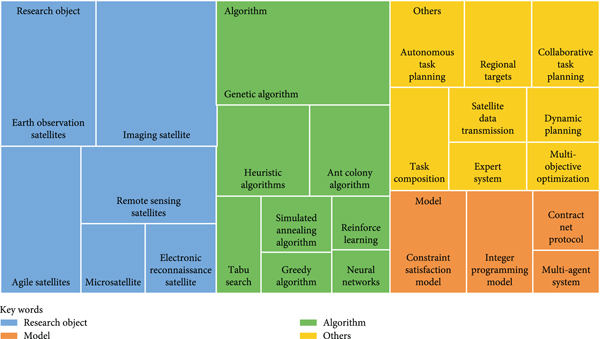

1º Pasar los valores de porcentajes a euros

2º Crear un nuevo dataframe con tres columnas (Coste_extra, Tipo_Coste_Extra, Valor)

3º Generar el mapa usando plotly

# POSIBLE CAMBIO DE GRAFICA PARA LOS PAISES

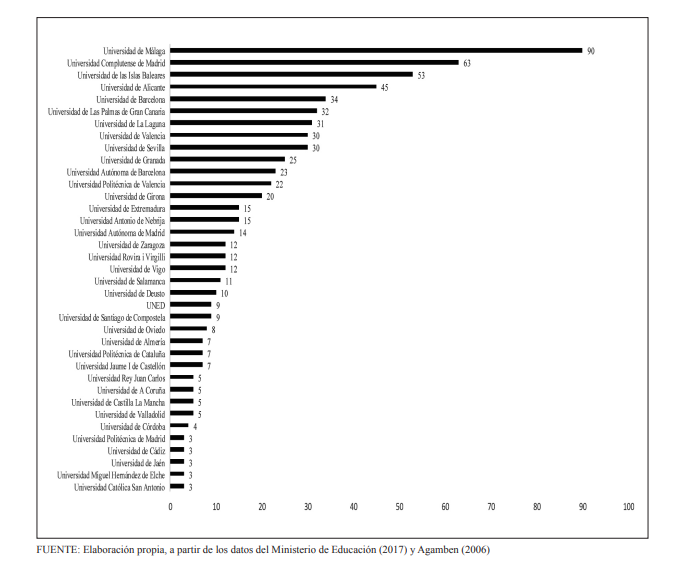

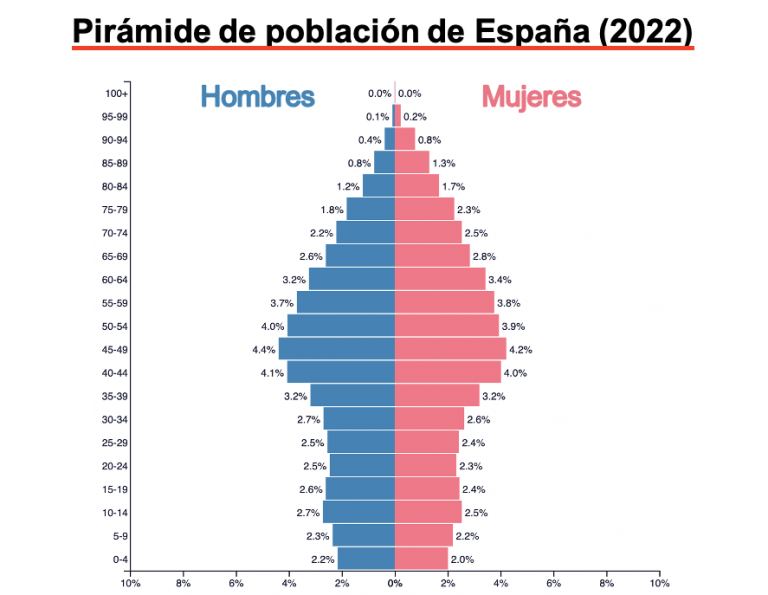


# BIBLIOGRAFÍA
https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
https://stackoverflow.com/questions/38318648/how-do-i-call-a-np-zeros-of-integers
https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
https://infogram.com/es/pagina/elige-el-grafico-correcto-visualizacion-datos#:~:text=Los%20gr%C3%A1ficos%20de%20l%C3%ADneas%2C%20barras,cantidad%20de%20datos%20para%20visualizar.
https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html
https://matplotlib.org/stable/api/projections_api.html#module-matplotlib.projections
https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html


stack barh


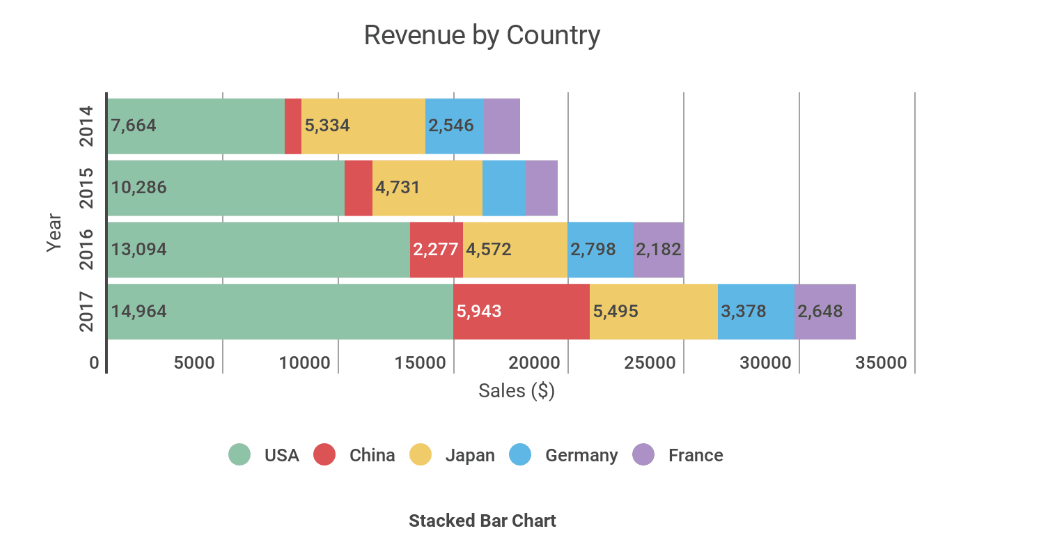

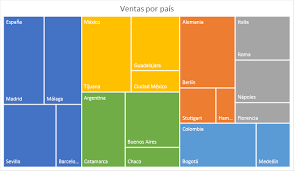

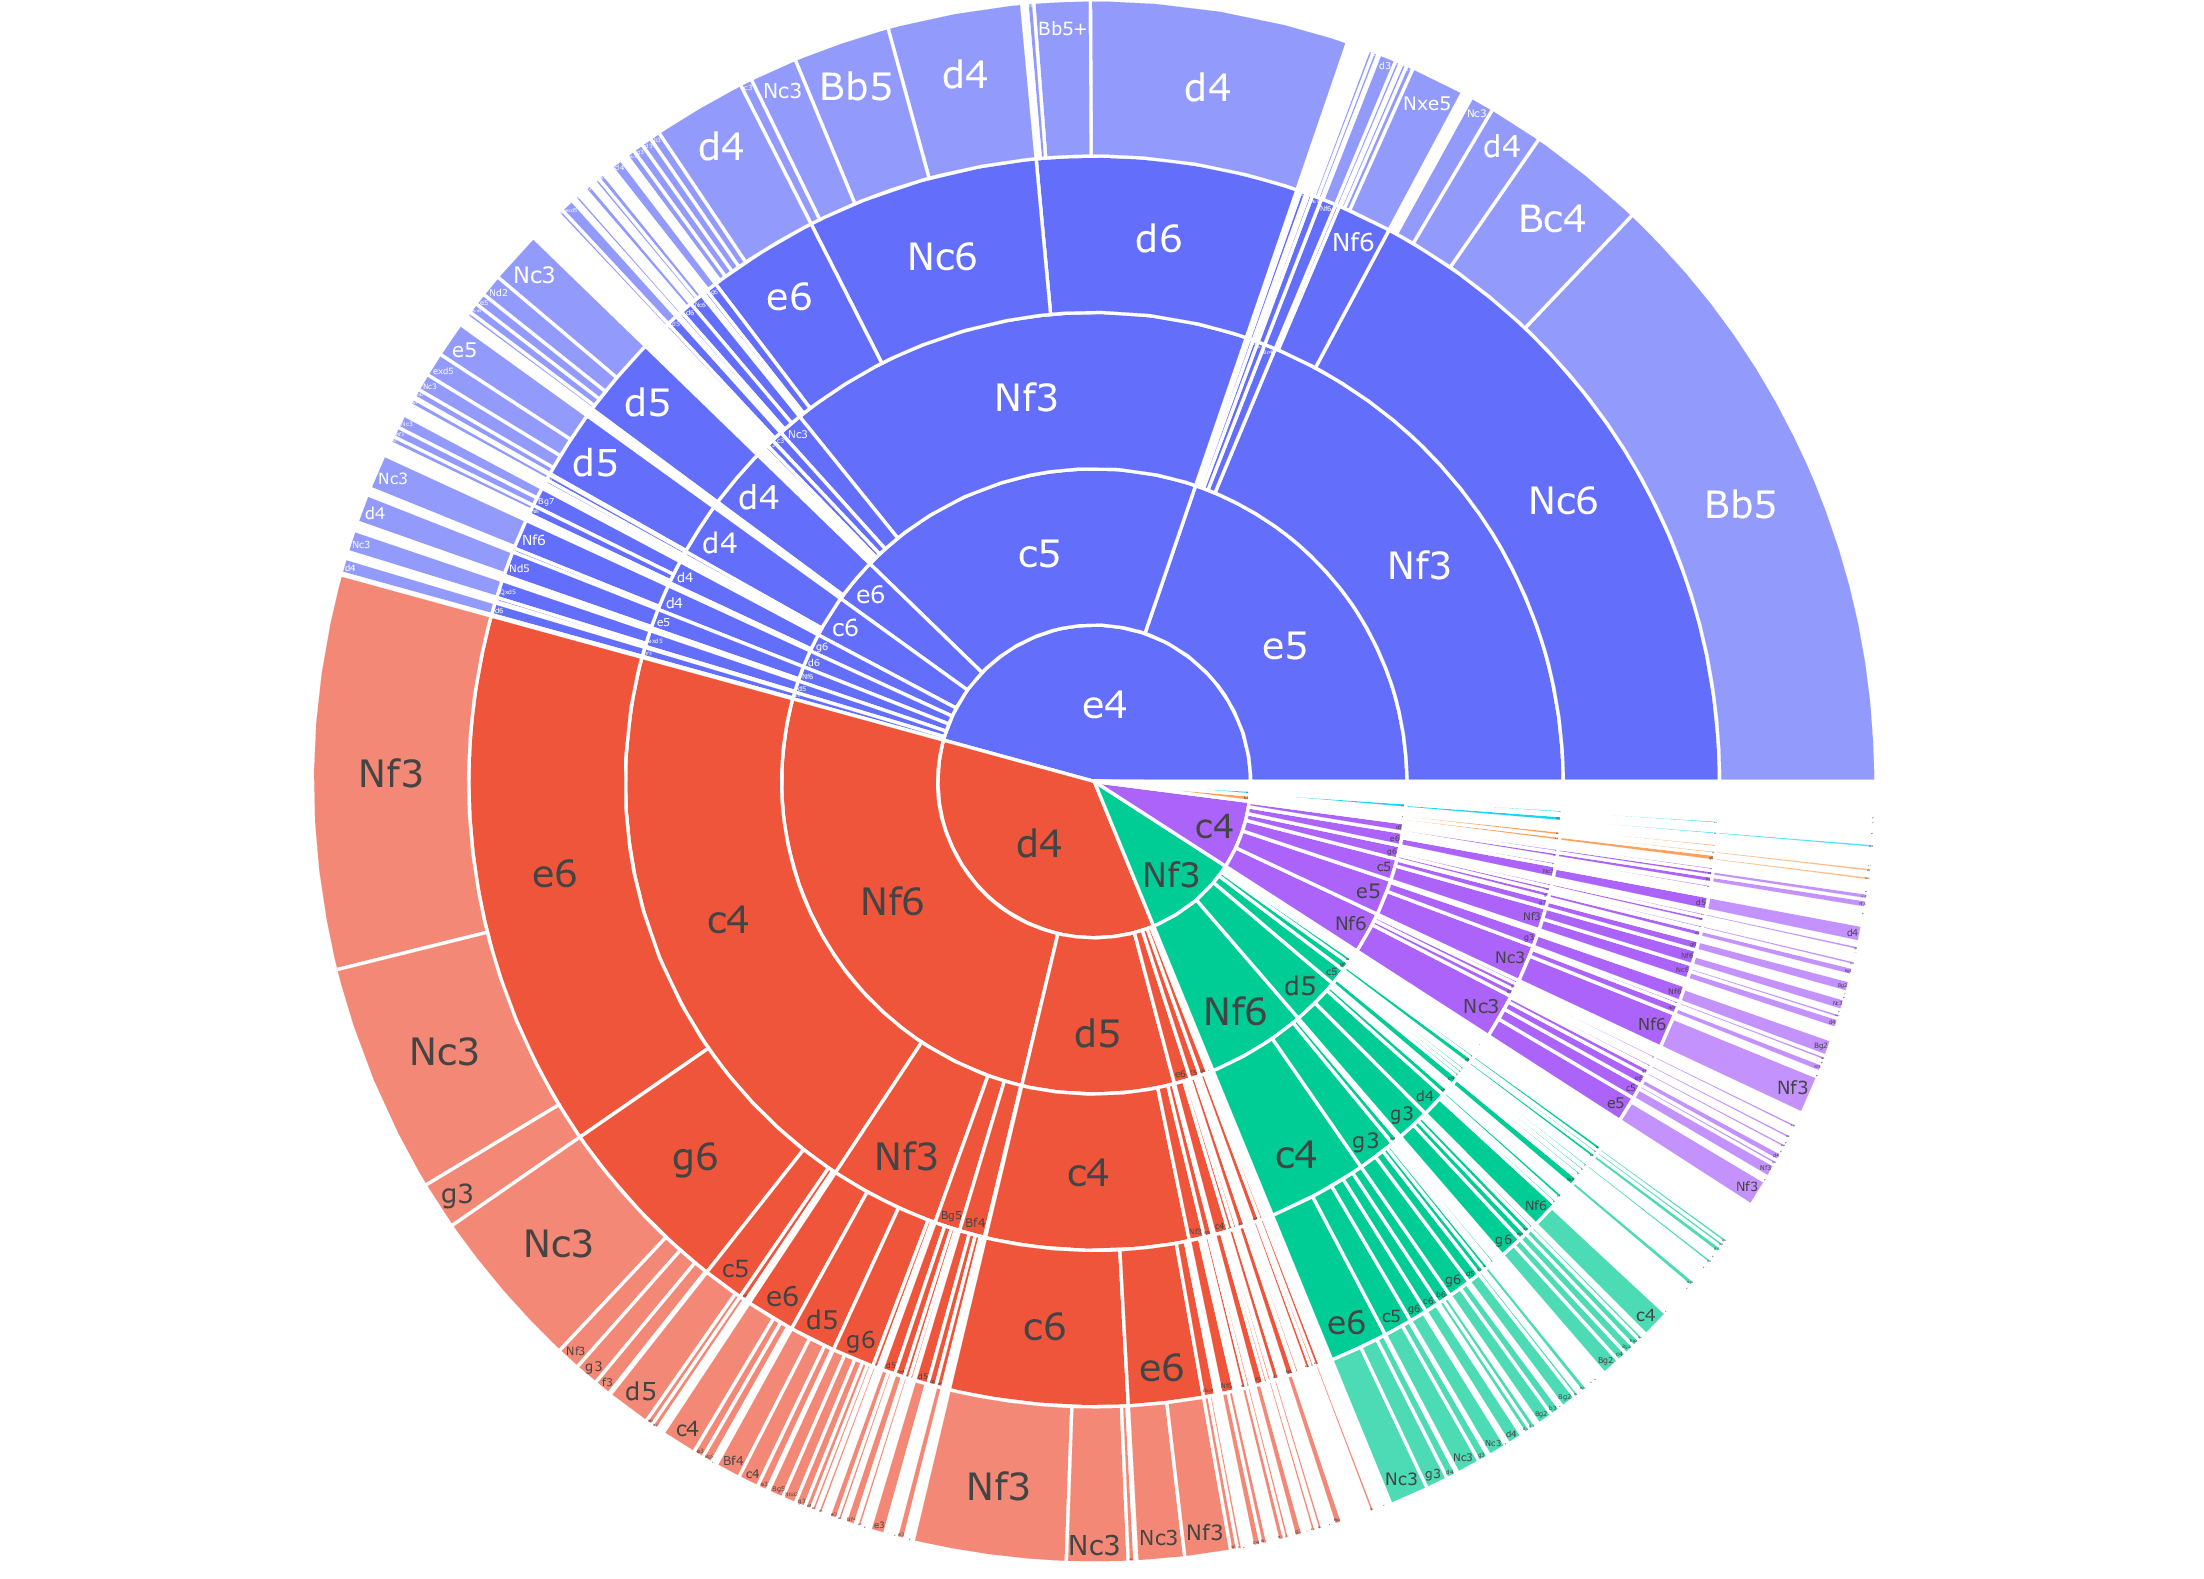

https://docs.google.com/viewerng/viewer?url=https://e-archivo.uc3m.es/bitstream/handle/10016/31974/TFG_Isabel-Maria_San-Jose_Garcia.pdf

https://community.plotly.com/t/need-help-in-making-diverging-stacked-bar-charts/34023

In [ ]:
import plotly.graph_objs as go

# Datos de ejemplo
x = ['A', 'B', 'C', 'D']
y1 = [10, 20, 30, 40]
y2 = [20, 30, 10, 50]
y3 = [5, 25, 35, 15]

# Crear la figura
fig = go.Figure()

# Agregar la primera pila
fig.add_trace(go.Bar(x=x, y=y1, name='Pila 1'))

# Agregar la segunda pila
fig.add_trace(go.Bar(x=x, y=y2, name='Pila 2'))

# Agregar subdivisiones a la primera pila
fig.add_trace(go.Bar(x=x, y=y3, name='Subdivisiones', marker_color='grey', marker_opacity=0.5))

# Establecer el modo de apilamiento
fig.update_layout(barmode='stack')

# Mostrar la gráfica
fig.show()

In [ ]:
Trimester = main_df.TRIMESTRE.unique()
Years = list(OrderedDict.fromkeys([s[:4] for s in Trimester]))
Countries = main_df.PAIS_RESIDENCIA.unique()

print(Countries)

zeros_array = np.zeros( (len(Years), len(Countries)), dtype=int )
z = np.zeros( (len(Years), len(Countries)), dtype=float )
print(Years)

nuevo_df = main_df.copy()
nuevo_df['GASTO_EUROS']=nuevo_df['GASTO_EUROS'].astype(float)

x = 0
for pais in Countries:
  y = 0
  for time in Years:
    zeros_array[y][x] = len(nuevo_df[(nuevo_df.PAIS_RESIDENCIA == pais) & (nuevo_df.TRIMESTRE.str.contains(time))])
    #CAMBIAR TOTAL POR MEDIA EN EL GASTO
    z[y][x] = nuevo_df.loc[(nuevo_df.PAIS_RESIDENCIA == pais) & (nuevo_df.TRIMESTRE.str.contains(time)), 'GASTO_EUROS'].mean()
    y += 1
  x += 1

test = np.concatenate((zeros_array), axis=None)
test2 = np.concatenate((z), axis=None)
test3 = np.concatenate((paths), axis=None)

# Todos los años juntos en una misma grafica
fig, ax = plt.subplots(figsize=(30, 10))
x = test
y = test2
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,test3):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Cada año su propia grafica
for iter in range(3):
  fig, ax = plt.subplots(figsize=(30, 10))
  x = zeros_array[iter]
  y = z[iter]
  ruta=paths[iter]
  ax.scatter(x, y) 
  ax.set_title("Diagrama de dispersión sobre la mediana de gasto de la representación de turistas según la cantidad de visitantes")
  ax.set_xlabel("Mediana de gasto")
  ax.set_ylabel("Número turistas")

  for x0, y0, path in zip(x, y,ruta):
      ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
      ax.add_artist(ab)
